# **Table of Contents:**

1.   Introduction
2.   Two Model Approach
3.   State of the art Causal Neural Networks
4.   Motivation for DRAGONNET
5.   DRAGONNET
6.   Results
7.   Bibliography

    


# 1.Introduction
Targeting the right customers is one of the biggest challenges that marketeers face. As a marketeer, to create an effective marketing campaign that target the right people, it is important to identify who these people are. Individuals differ not only in their characteristics, but also in how they respond to a particular treatment, which could be promotion emails, coupons, ads, etc. Therefore, our aim in this tutorial is to predict the heterogeneous treatment effects, by using neural networks. First, we will give an overview on the main concepts, which also connect to the main focus of this notebook, in causal inference. Introduction will continue with a very well known model, called T-learner or two model approach. Then, we illustrate one of the most recent neural network models in estimating heterogeneous treatment effects - Dragonnet-. Finally, we present the results and discuss how our proposed model could improve estimation quality.


### 1.1 What is Causal Inference and how can we estimate it?

Causal inference is to understand the effects of any treatment or intervention.  Effect of a new drug on patients or change in sales after sending coupons to customers can be two simple examples for causal inference. 
People tend to think that association implies causation. This is actually a cognitive bias, since there might be a latent reason affecting two separate events. For example, looking at the data of the people who go to sleep with their shoes on; you might realize that those people tend to wake up with headache. 

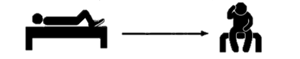

Naturally you think that you shouldn’t go to bed with shoes on in order not to have headache, because you believe that sleeping with shoes on causes headache. Let’s say you also have the information in your data that most of the people who go to sleep with shoes on heavily drink the night before

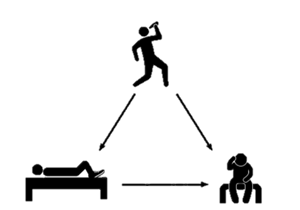

Therefore, you would think that the only reason that we see this association between shoe-sleepers and headache is because there is a common cause, drinking the night before. However, the correct way to resolve the association between these two is to think of the association as composed of confounding and causal associations.  Causal part of the total association states that going to bed with shoes on does actually have an effect on headache, while confounding part of the total association states that the common cause “drinking the night before” creates another association between shoes on and headache

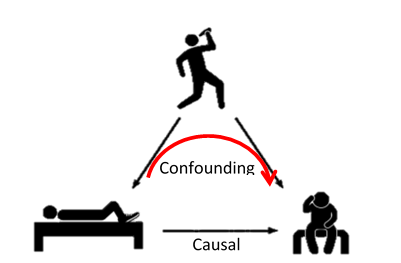

In general, when you measure association between two variables, you are looking at both causal and confounding association, like in the previous example. 
Then, what does causation imply? How can we know that something induce something else? How can one be sure that we measure only the cause of something? 
We can answer these questions by looking at the potential outcomes. 
Let’s assume that you have a headache. You might think that your headache may go away if you take a painkiller. Let’s denote your headache situation Y(1) if you take the pill and Y(0) if you don’t.  We can define the causal effect of taking painkiller on your headache as follows:


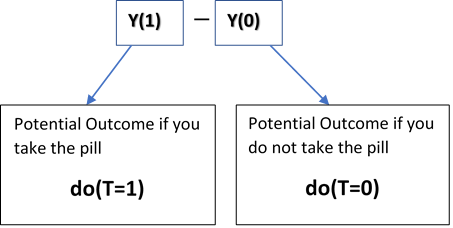

However, there is a fundamental problem here. We cannot observe both of these potential outcomes. For instance, if you take the pill and your headache is gone, you cannot observe what would have happened if you did not to take the pill. The scenario that we cannot observe is called “counterfactual”. The only way to see whether the pill is the cause of your relief, is if you had a twin sibling who has the same conditions as you. However, this is almost always not the case. Since you cannot observe the counterfactual, you cannot calculate causal effect. 

Individual Treatment Effect (ITE)  =  $Y_i(1)- Y_i(0)$

Average Treatment Effect (ATE)  = $\mathbb{E}[ Y_i(1)- Y_i(0) ]  = \mathbb{E}[ Y(1)- Y(0) ] = \mathbb{E}[ Y(1) ] - \mathbb{E}[ Y(0) ]$

You may want to write ATE conditioned on treatment T

ATE = $\mathbb{E}[ Y(1)- Y(0)]  = \mathbb{E}[ Y(1) ] - \mathbb{E}[ Y(0) ] =  \mathbb{E}[ Y | T = 1 ] - \mathbb{E}[ Y|T = 0 ]$ ....(1)

ATE = $\mathbb{E}[ Y(1)- Y(0)]  = \mathbb{E}[ Y(1) ] - \mathbb{E}[ Y(0) ] =  \mathbb{E}[ Y| do( T = 1)] - \mathbb{E}[ Y| do(T = 0) ]$ .......(2)

The first equation is not always true because $P(Y | T  = t )$  defines the observational distribution of outcome with respect to treatment. The second equation is based on the interventional distribution $P(Y |do(T  = t) )$.   What is the difference between do conditioning and normal conditioning? Let’s take a look the following figures to get an intiution

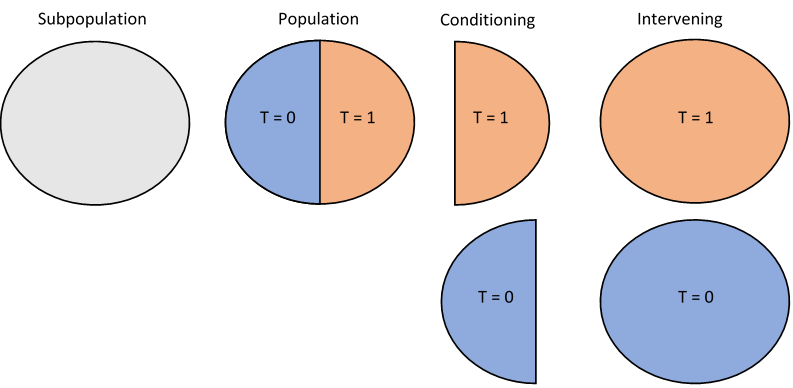

Conditioning is subsetting the part of a population that meets the given condition. It is obtained after events happen and the data is available. On the contrary, do operator intervenes the way that events happen, therefore the interventional distribution is result of experiments. 
It is time to go back to the first example to make the concept more clear. In the example, observational data was given. It was said that most of the people who go to sleep with shoes on also drink the night before. The observational data looks like the figure below:


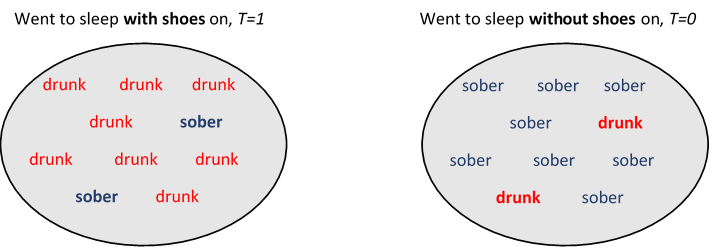

Imagine that someone goes into rooms of these people, tosses a coin, if it is heads up then he/she decides that the person will sleep with shoes on, if it is tails up the he/she decides the person will sleep without shoes on. In this case, that person is intervining and taking shoes off or putting shoes on. At the end of the experiment, the data would look like as follows:

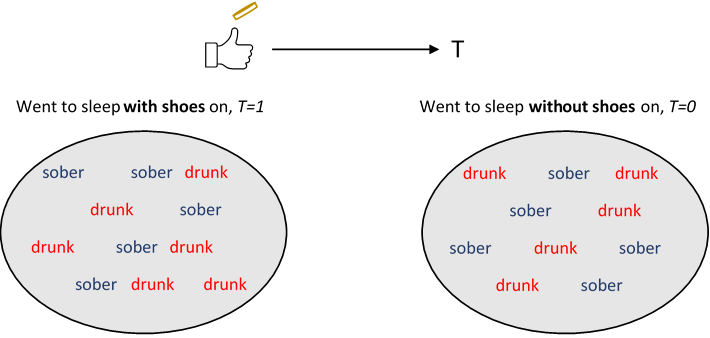

Remember that the discussion was that ATE cannot be written in terms of conditioning on treatment most of the time, ie. the following equality doesn’t hold most of the time

ATE = $ \tau = \mathbb{E}[ Y(1)- Y(0)]  =  \mathbb{E}[ Y(1) ] - \mathbb{E}[ Y(0) ] =  \mathbb{E}[ Y | T = 1 ] - \mathbb{E}[ Y |T = 0 ]$

When observational data conditioned on treatment, the resulting data subset could be biased because there might be a common cause, in the example drinking the night before, which creates confounding association between treatment and outcome variable. Therfore, the calculated total effect of treatment on outcome consists of not only causal effect but confounding effect that is result of not having the treatment and control group equal. 


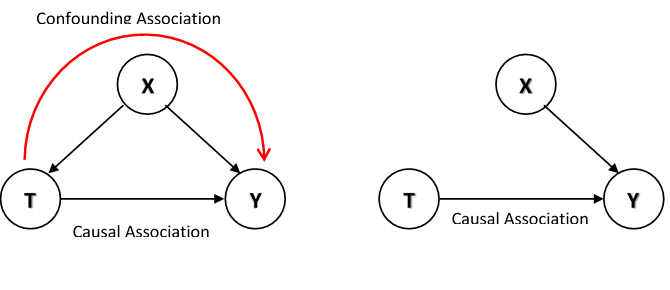

Randomized controlled trials comes into play at this point. The aim is to create two datasets. These two sets will be as similar as possible for every variable except treatment. The aim is trying to create a twin of each observation, one twin will be given the treatment, do(T=1), the other will not, do(T=0), so that the measured association between treatment and outcome consists of only causal association. We can write ATE in terms of conditional expectation of treatment only if the data is experimental data or like experimental data
We cannot create a prediction model for $E[ Y | do( T = 1)] - E[ Y| do(T = 0) ]$. It is necessary to somehow convert this do operation into conditional expectation so that a prediction model can be created. Blocking backdoor paths (i.e. confounding associations) is the solution to this problem. Backdoors can be blocked by conditioning on the confounding variables.  Recall how drunk people were distributed betweenn T=1 and T=0 to see the effect of conditioning on the confounding variable

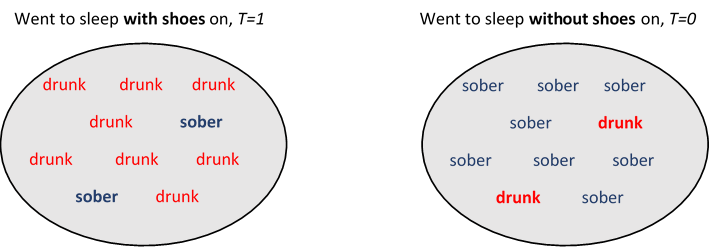

As it can be seen from the figure, drunk and sober people are not distributed evenly between two groups. Let’s condition on this confounding variable (i.e. drinking the night before) as backdoor adjustment suggests. There two distinct values of the confounding variable. Therefore, there are two cases to be conditioned on:

1.	$E[ Y |Confounding = drunk]    
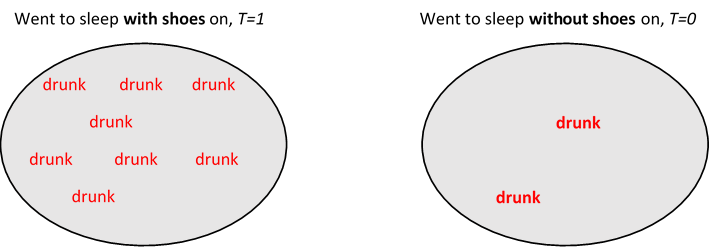


2.	$E[ Y |Confounding = sober]
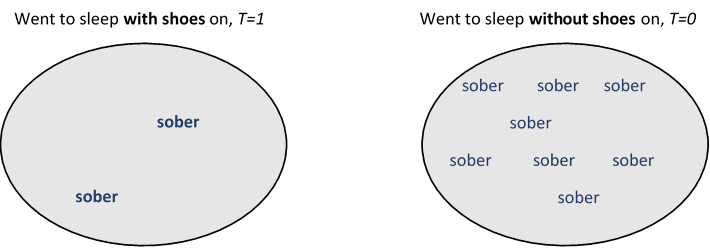

Backdoor adjustment suggests that when confounding variables are conditioned on, then treatment and control groups become comparible.  Remember the goal was to find an estimand for  ATE = $\mathbb{E}[ Y |do( T = 1)] - \mathbb{E}[ Y|do(T = 0) ]$  when there is observational data at hand. If potential outcome is conditioned on all of the confounding variables, then the problem is solved and the estimate for ATE becomes :

$\mathbb{E}[ Y_i | do( T = 1)] - \mathbb{E}[ Y_i| do(T = 0) ]  = \mathbb{E}[ Y_i | do( T = 1), X] - \mathbb{E}[ Y_i| do(T = 0), X ]$ ,which can be estimated by 

$\mathbb{E_x}[\mathbb{E}[ Y_i | T=1, X] - \mathbb{E}[ Y_i| T=0, X ]]$

because after conditioning on confounding variables, treatment and control groups become comparible


In general, we want to optimize a treatment effect which is more individualized than ATE. For example, we have individuals with covariates x, and we would like to make a more accurate treatment effect estimation for this subgroup of individuals. Then this treatment effect is called conditional average treatment effect  (CATE) and formulated as $\tau(x) = \mathbb{E}[ Y_i (1)- Y_i (0)| X =x]$.  X usually doesn’t contain everything which is related to individual’s potential outcome, therefore, ITE and CATE are different than each other. If covariates X contains all the relavent information to outcome, then CATE and ITE becomes the same. 

ATE = $ \tau = \mathbb{E_x}[\mathbb{E}[ Y_i | T=1, X] - \mathbb{E}[ Y_i| T=0, X ]]$

CATE = $ \tau(x) = \dfrac{1}{n_x}\sum_{i:x_i=x}\mathbb{E}[ Y_i (1)- Y_i (0)| X =x] = \dfrac{1}{n_x}\sum_{i:x_i=x}(\mathbb{E}[ Y_i | T=1, X =x]-\mathbb{E}[ Y_i | T=0, X =x])$

If we condition on all of the confounding variables and treatment effect, then our neural network may ignore the treatment and assign a very small weight to it which may 

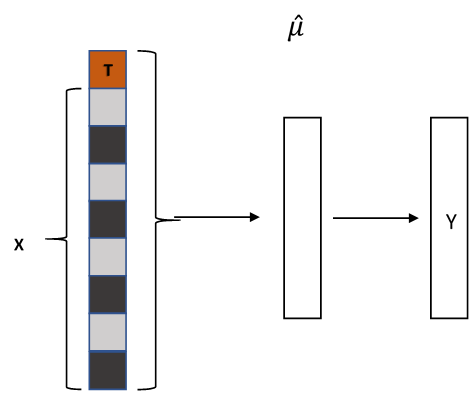

In [1872]:
def setseed():
    # Seed value
    # Apparently you may use different seed values at each stage
    seed_value= 42

    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(seed_value) 

    # 4. Set the `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    # tf.random.set_seed(seed_value)
    # for later versions: 
    tf.compat.v1.set_random_seed(seed_value)

    # 5. Configure a new global `tensorflow` session
    from keras import backend as K
    # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    # K.set_session(sess)
    # for later versions:
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

# 2. Two Model Approach

## 2.1 Data Generation

### How we generate the data?

•	Create covariate matrix (values between 0 and 1) by a multivariate normal distribution over the population number n (1000).

•	Generate Treatment binary values (0 or 1) conditional on covariates. How? By applying a propensity score to the covariate matrix.

  A propensity score is the probability that a unit with certain characteristics will be assigned to the treatment group (as opposed to the control group). The scores can be used to reduce or eliminate selection bias in observational studies by balancing covariates (the characteristics of participants) between treated and control groups.

•	Treatment effect for each person is calculated to be conditional on covariate, such that: If x[1] >= 0.1, then it gets the value 8, otherwise it is 0.

•	Outcome values are random uniformly distributed (controlled outcome), then we add the simulated treatment effect from the previous step to get the final outcome Y.



In [12]:
#@title Libraries

# Main imports
!pip install econml
from econml.data.dgps import ihdp_surface_B

# Helper imports 
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform

import pandas as pd
from sklearn.model_selection  import train_test_split

!pip install keras
!pip3 install tensorflow
import tensorflow as tf

import keras.backend as K
from keras.engine.topology import Layer
from keras.metrics import binary_accuracy

from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense, Concatenate
from keras import regularizers
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from keras.utils import plot_model

import rpy2
%load_ext rpy2.ipython
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter


import talos
import wrangle

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.utils import plot_model
from keras.layers.merge import concatenate
import talos
from sklearn import preprocessing


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


The data generation process below was used in Künzel et al.(2019), that compares meta learneers. This process can be summarized by the formulas below.


$$ Y= \mu_1(x)\cdot T + \mu_0(x)\cdot (1-T) + \epsilon T \sim  Bern(e(x)), e(x)=P(T=1|X=x)$$
where

$$ \mu_0(x) =x^T\beta,  with \beta\sim Unif([-3,3]^d),X_i \sim N(0, \Sigma )\mu_1(x)=\mu_0(x)+8(\textit 1 (x_2>0.1))=>CATE(x)=8(\textit 1 (x_2>0.1))
$$


In [13]:
#Data generation process in Künzel et al.(2019)
def generate_data(n, d, controls_outcome, treatment_effect, propensity):
    """Generates population data for given untreated_outcome, treatment_effect and propensity functions.
    
    Parameters
    ----------
        n (int): population size
        d (int): number of covariates
        controls_outcome (func): untreated outcome conditional on covariates
        treatment_effect (func): treatment effect conditional on covariates
        propensity (func): probability of treatment conditional on covariates
    """

    # Generate covariates
    X = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n)
    # Generate treatment
    T = np.apply_along_axis(lambda x: np.random.binomial(1, propensity(x), 1)[0], 1, X)
    # Calculate outcome
    Y0 = np.apply_along_axis(lambda x: controls_outcome(x), 1, X)
    treat_effect = np.apply_along_axis(lambda x: treatment_effect(x), 1, X)
    Y = Y0 + treat_effect * T
    return (Y, T, X,treat_effect)

# controls outcome, treatment effect, propensity definitions
def generate_controls_outcome(d):
    beta = np.random.uniform(-3, 3, d)
    return lambda x: np.dot(x, beta) + np.random.normal(0, 1)
treatment_effect = lambda x: (1 if x[1] > 0.1 else 0)*8
propensity = lambda x: (0.8 if (x[2]>-0.5 and x[2]<0.5) else 0.2)

In [14]:
# DGP constants and test data
d = 5
n = 1000
n_test = 250
controls_outcome = generate_controls_outcome(d)
X_test = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n_test)
delta = 6/n_test
X_test[:, 1] = np.arange(-3, 3, delta)

Y, T, X,treat = generate_data(n, d, controls_outcome, treatment_effect, propensity)

data=pd.DataFrame(np.column_stack([X, Y, T, treat]))
data.rename(columns={5: "Y", 6: "T", 7: "treatment_effect"},inplace=True)

In [15]:
data

,0,1,2,3,4,Y,T,treatment_effect
0,0.289551,-0.805085,0.944133,0.054837,0.076377,-2.482461,0.0,0.0
1,1.776519,-1.608000,-1.621204,-1.396005,0.363633,-1.023158,1.0,0.0
2,-0.359044,-0.279546,-0.942416,1.665251,2.001018,1.120528,0.0,0.0
3,0.898905,-1.507286,-0.486897,0.827461,-0.045829,-2.388805,1.0,0.0
4,0.902220,1.247815,1.907196,-0.654865,0.081285,-3.835760,0.0,8.0
...,...,...,...,...,...,...,...,...
995,-0.726090,0.641849,-0.812301,-0.274404,0.394779,10.846909,1.0,8.0
996,-0.252606,-0.562578,-1.207228,1.449329,1.636112,1.425095,1.0,0.0
997,0.329336,-0.232117,-0.177172,0.832193,1.031782,-1.785472,1.0,0.0
998,-0.540153,1.074608,0.615089,1.057224,-1.601777,0.104246,0.0,8.0


In our synthetic data we have 1000 individuals; 54% of the population have not been treated (Controlled group) and 46% of the population have been treated (Treatment group), which means that controlled and treatment groups are not perfectly balanced. 

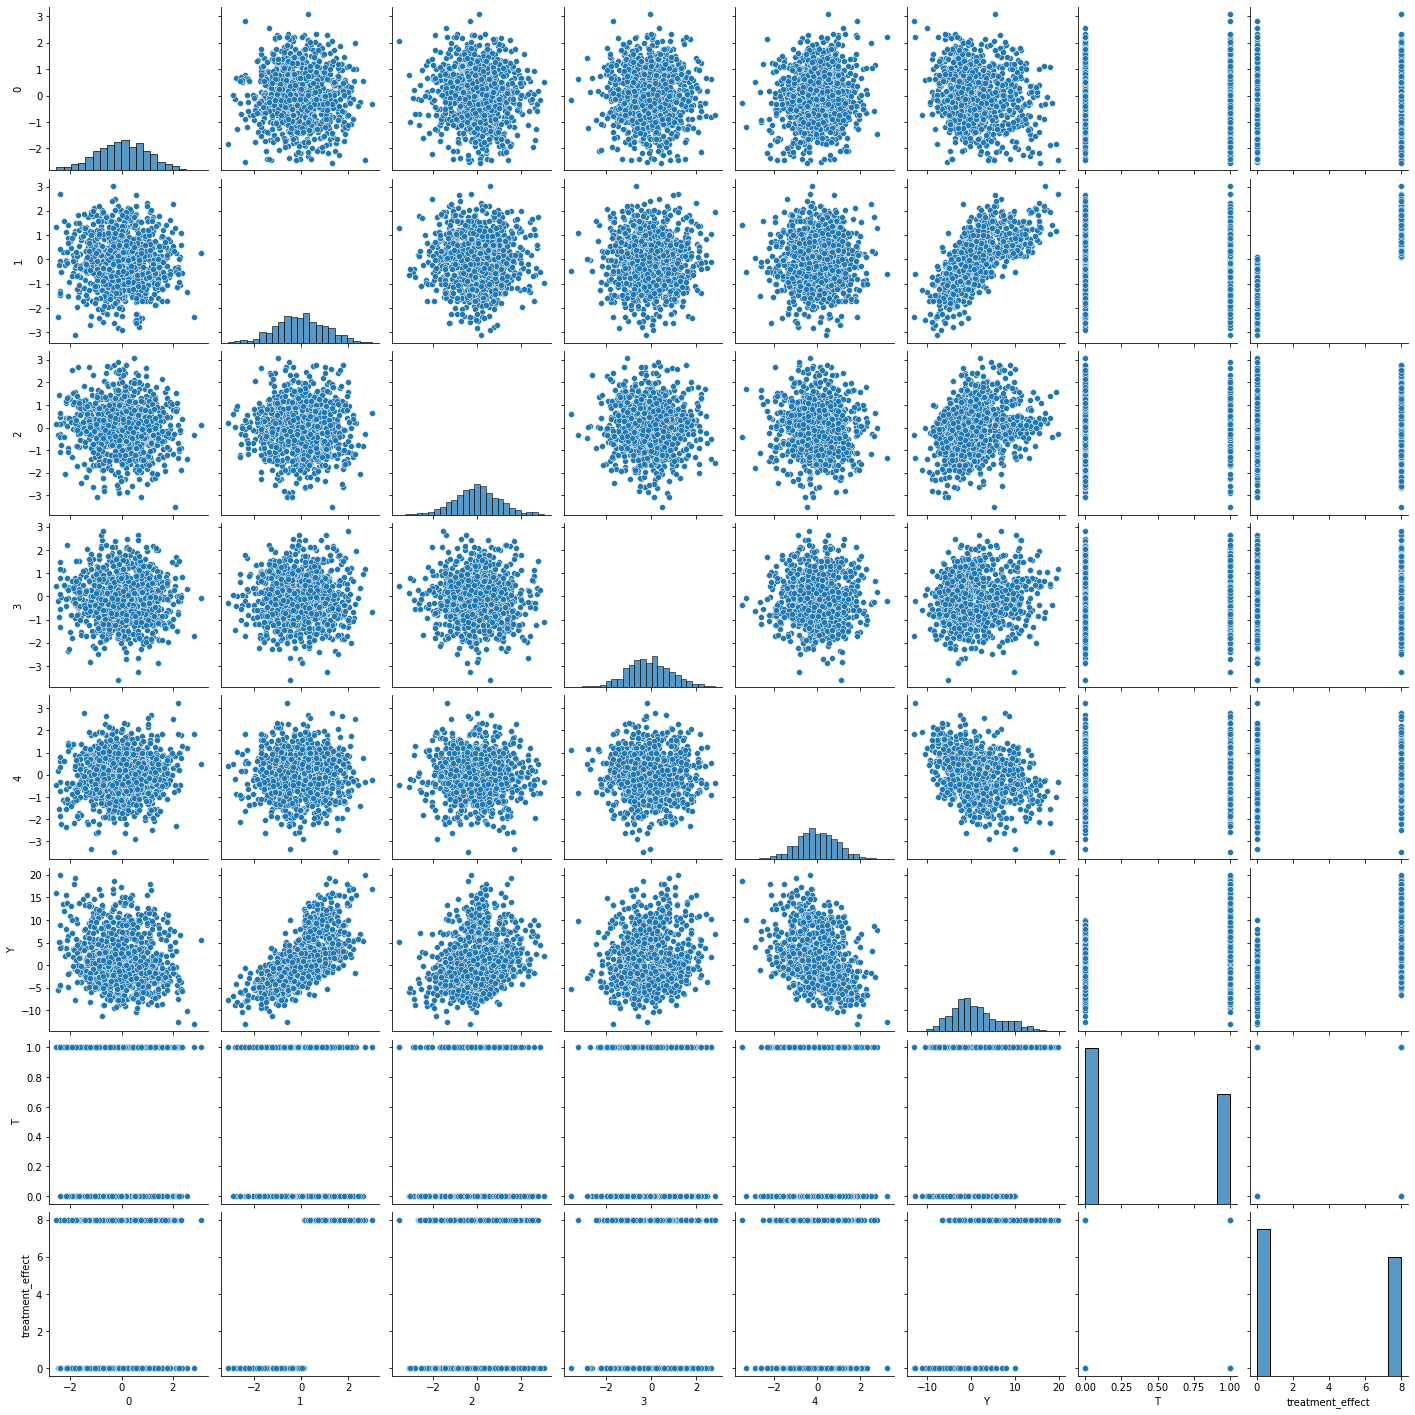

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(data)
plt.show()


Our synthetic dataset has 5 covariates, an output Y, a treatment T(0 or 1) and a treatment effect(0 or 8). The plot shows that the covariates in the dataset are highly uncorrelated. Looking at the relationship between treatment T and the covariates, we see that for each covariate the population that has been treated is almost equal to those with the same covariate and has not been treated, this is because of the propensity score, which makes treatment conditional on covariates.

## 2. 2 Two model approach 

Two model approach is one of the simplest and easy to understand approaches in predicting CATE. It doesn't predict CATE directly, it has two models, as name suggests, each predicting the outcome variable (which could be whether a customer responded or the amount of money that the customer spent) seperately. The difference between models is that one of the models is trained using only the treated observations and the other is trained using only the control group observations. The final CATE estimation is the difference between the predictions of these two models.

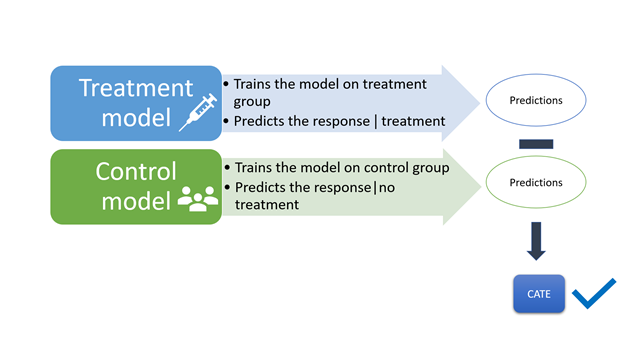

We have merged all of the variables and target in one dataframe so that train-test split process will be more convenient and safe. 30% of the data is used as test set. The validation set is created seperately after the train_test split function is applied.

In [16]:
def train_test(data,treatment,response, cols, Two_Model, synthetic):
    
    X_train,X_val,Y_train,Y_val = train_test_split(data, data[response], test_size=0.3, random_state = 15)
    
       
    df1 = X_train.loc[X_train[treatment] == 1].reset_index()
    df0 = X_train.loc[X_train[treatment] == 0].reset_index()

    T_train = X_train[treatment]
    Y_train = X_train[[response, treatment]]
    X_train = X_train[cols]
    
    T_val = X_val[treatment]
    Y_val = X_val[response]
    if (synthetic):
        TE_val=X_val['treatment_effect']
    X_val=X_val[cols]
    

    X_treatment=df1[cols]
    Y_treatment=df1[response]

    X_control=df0[cols]
    Y_control=df0[response]
    
    if (synthetic == True):
        if (Two_Model == True):
            return(X_treatment,Y_treatment,X_control,Y_control,X_val, Y_val, T_val, TE_val)
        else:
            return(X_train, Y_train, T_train, X_val,Y_val, T_val, TE_val)
    else :
        if (Two_Model == True):
            return(X_treatment,Y_treatment,X_control,Y_control,X_val, Y_val, T_val)
        else:
            return(X_train, Y_train, T_train, X_val,Y_val, T_val)

In [17]:
class TwoModel():
    def __init__(self, X_treatment, X_control,Y_treatment,Y_control, X_val_t, y_val_t, X_val_c, y_val_c, params):
        self.X_treatment = X_treatment
        self.X_control = X_control
        self.Y_treatment = Y_treatment
        self.Y_control = Y_control
        self.X_val_t = X_val_t
        self.y_val_t = y_val_t
        self.X_val_c = X_val_c
        self.y_val_c = y_val_c
        self.params = params
    def modelTreatment(self):
# define the keras model for the treatment group
        model_t = Sequential()
        model_t.add(Dense(self.params['neurons_per_layer'], input_dim=self.X_treatment.shape[1], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_t.add(Dense(self.params['neurons_per_layer'], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_t.add(Dense(self.params['neurons_per_layer'], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_t.add(Dense(self.params['neurons_per_layer'], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_t.add(Dense(self.params['neurons_per_layer'], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_t.add(Dense(1, activation=None, kernel_regularizer=regularizers.l2(self.params['reg_l2'])))

        return(model_t)
    
    def modelControl(self):
# define the keras model for the control group
        model_c = Sequential()
        model_c.add(Dense(self.params['neurons_per_layer'], input_dim=self.X_control.shape[1], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_c.add(Dense(self.params['neurons_per_layer'], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_c.add(Dense(self.params['neurons_per_layer'], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_c.add(Dense(self.params['neurons_per_layer'], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_c.add(Dense(self.params['neurons_per_layer'], activation='elu',kernel_regularizer=regularizers.l2(self.params['reg_l2'])))
        model_c.add(Dense(1, activation=None, kernel_regularizer=regularizers.l2(self.params['reg_l2'])))

        return(model_c)
#     def Callback(self):
#         adam_callbacks = [TerminateOnNaN(),
#                      EarlyStopping(monitor='val_loss', patience=50, min_delta=0.),
# #                      ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=True, mode='auto',
# #                      min_delta=1e-8, cooldown=0, min_lr=0)]
#                          ]
#         return(adam_callbacks)
    
    def fit(self,whichmodel):
#         self.callbacks=self.Callback()

        if (whichmodel=='treatment'):
            self.model_t=self.modelTreatment()
            self.model_t.compile(loss='mse', optimizer=Adam(lr=self.params['learning_rate']), metrics=['mse'])
            self.model_t.fit(self.X_treatment, self.Y_treatment,
#                              callbacks=self.callbacks, 
                             validation_data=(self.X_val_t, self.y_val_t),
                             epochs=self.params['epochs'],batch_size=self.params['batch_size'],verbose=False)
        else : 
            self.model_c=self.modelControl()
            self.model_c.compile(loss='mse', optimizer=Adam(lr=self.params['learning_rate']), metrics=['mse'])
            self.model_c.fit(self.X_control, self.Y_control, 
#                              callbacks=self.callbacks, 
                                validation_data=(self.X_val_c, self.y_val_c),
                                epochs=self.params['epochs'],batch_size=self.params['batch_size'],verbose=False)
        
    def predict(self,X_val):
        self.fit('treatment')
        self.fit('control')         
        CATE = self.model_t.predict(X_val)-self.model_c.predict(X_val)
        return(CATE)

In [18]:
X_treatment,Y_treatment,X_control,Y_control, X_test, Y_test, T_test, TE_test = train_test(data, 'T','Y', [0,1,2,3,4], True, True)

In [19]:
X_treatment_, X_val_t, Y_treatment_, Y_val_t = train_test_split(X_treatment, Y_treatment, test_size=0.2)
X_control_, X_val_c, Y_control_, Y_val_c = train_test_split(X_control, Y_control, test_size=0.2,random_state=42)

In [20]:
setseed()

In [22]:
params = {'neurons_per_layer':200,
          'targeted_reg':False,
          'ratio':1.,
          'batch_size':64,
          'epochs':30,
          'learning_rate':0.001, 
          'reg_l2':0.01}

In [23]:
ModelTwo_Syn=TwoModel(X_treatment_, X_control_, Y_treatment_, Y_control_, X_val_t, Y_val_t, X_val_c, Y_val_c, params)

In [24]:
CATE_TwoModel_Syn = ModelTwo_Syn.predict(X_test)

## 2.3 Performance Measures

We evaluate treatment models by looking at cumulative gain charts. (i.e. QINI Curves) These charts are constructed by sorting the population from the highest treatment effect to the lowest. Below you can see the QINI Curves for 2 model approach and Dragonnet. The x-axis represents the proportion of population targeted and the y-axis represents the cumulative incremental gains. We report QINI Score, which is the area between uplift curve of our models and the random curve. A QINI Score near 1 corresponds to a good performance, whereas a QINI Score near 0 corresponds to a worse one. We cannot say Dragonnet is clearly superior to two model approach only by looking at uplift curves and QINI Scores, but this can be due to a lack of Dragonnet-tuning. Moreover, we use 2 model approach with NN as a benchmark, which is a good predictor without any tuning. 


In [402]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_Obj = ro.conversion.py2rpy(pd.concat([pd.DataFrame(CATE_TwoModel_Syn),pd.DataFrame(Y_test).reset_index(drop=True),pd.DataFrame(T_test).reset_index(drop=True)],axis=1))

[1] 0.9906145


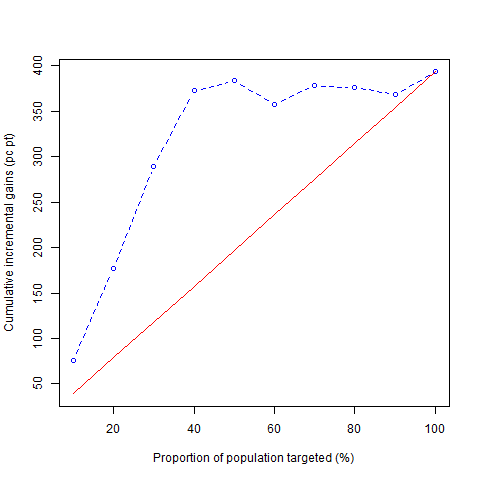

In [403]:
%%R -i r_Obj
scores=unlist(decompose(r_Obj)[1])
Y=unlist(decompose(r_Obj)[2])
W=unlist(decompose(r_Obj)[3])
qini_score(scores, Y, W, 0.5, 10, TRUE)

In [413]:
np.mean(tf.square(TE_test.values - CATE_TwoModel_Syn.reshape(TE_test.size,)))

2.548715690052408

In [427]:
params = {'neurons_per_layer':200,
          'targeted_reg':False,
          'ratio':1.,
          'batch_size':64,
          'epochs':30,
          'learning_rate':0.001, 
          'reg_l2':0.01,
          'loss_func':dragonnet_loss_binarycross}

In [428]:
X_train, Y_train, T_train, X_test, Y_test, T_test,TE_test = train_test(data,'T','Y',[0,1,2,3,4], False, True)
X_train_, X_val, Y_train_, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [429]:
setseed()
out, model = fit_predict(X_train_, Y_train_, X_val,Y_val, params)

In [430]:
CATE_Dragon_Syn = predict_tau(X_test,model)

In [431]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_Obj = ro.conversion.py2rpy(pd.concat([pd.DataFrame(CATE_Dragon_Syn),pd.DataFrame(Y_test).reset_index(drop=True),pd.DataFrame(T_test).reset_index(drop=True)],axis=1))

[1] 1.001184


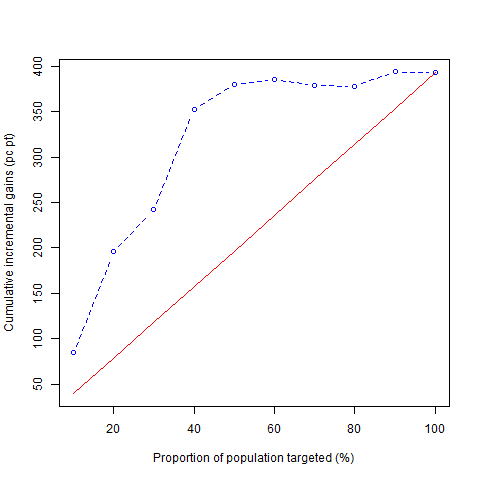

In [432]:
%%R -i r_Obj
scores=unlist(decompose(r_Obj)[1])
Y=unlist(decompose(r_Obj)[2])
W=unlist(decompose(r_Obj)[3])
qini_score(scores, Y, W, 0.5, 10, TRUE)

In [433]:
np.mean(tf.square(TE_test.values - CATE_Dragon_Syn.reshape(TE_test.size,)))

1.8134130489188949

In [437]:
True_ITE.size

300

In [438]:
True_ITE= TE_test.values.reshape(True_ITE.size,1)
mse= np.mean(tf.square(CATE_Dragon_Syn - True_ITE))
mse_2model= np.mean(tf.square(CATE_TwoModel_Syn - True_ITE))
TE_test = TE_test.reset_index(drop=True)
z=pd.concat([TE_test, pd.DataFrame(CATE_TwoModel_Syn)], axis=1)
z.rename(columns={ z.columns[1]: "CATE_TwoModel"}, inplace=True)
z=pd.concat([z, pd.DataFrame(CATE_Dragon_Syn)], axis=1)

z.rename(columns={z.columns[2]: 'CATE_Dragon'}, inplace=True)
z.sort_values(by='treatment_effect', inplace=True)
z.reset_index(inplace=True)

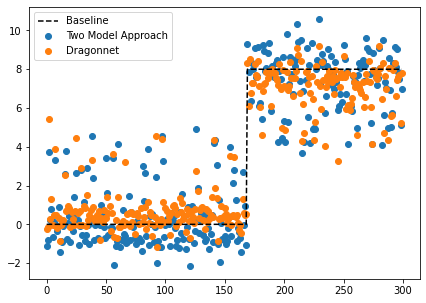

In [439]:
### Comparison plot of 2 model and Dragonnet
from matplotlib import pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(np.arange(0,True_ITE.size,1), z['treatment_effect'], color='black', ls='--', label='Baseline')
plt.scatter(np.arange(0,True_ITE.size,1), z['CATE_TwoModel'], label="Two Model Approach")
plt.scatter(np.arange(0,True_ITE.size,1), z['CATE_Dragon'], label="Dragonnet")
plt.legend()

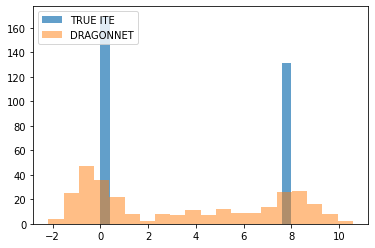

In [441]:
from matplotlib import pyplot
pyplot.hist(TE_test, 20, alpha=0.7, label='TRUE ITE')
pyplot.hist(CATE_TwoModel_Syn, 20, alpha=.5, label='DRAGONNET')
pyplot.legend(loc='upper left')
pyplot.show()

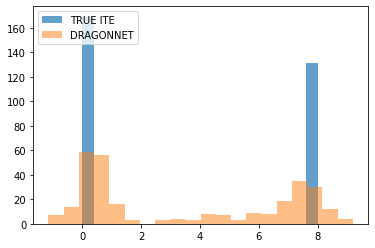

In [440]:
from matplotlib import pyplot
pyplot.hist(TE_test, 20, alpha=0.7, label='TRUE ITE')
pyplot.hist(CATE_Dragon_Syn, 20, alpha=.5, label='DRAGONNET')
pyplot.legend(loc='upper left')
pyplot.show()

# 3. State-of-the-art Causal Neural Networks
We present the current related state-of-the-art networks. Looking at the table, novel aproaches in neural networks has been presented in the past few years and in different domains. Neural networks are mostly designed to estimate  the Individual Treatment Effect(ITE) and overcome its problems. In medicine, for example, ITE estimating could help medications to get better outcomes for new patients.

We defined CATE briefly before. To understand CATE estimates, we consider a new unit i with covariate vector xi, in order to
decide whether to give the unit the treatment, we wish to
estimate the Individual Treatment Effect (ITE) of unit i,
Di, which is defined as:

$
D_i:=Y_i(1) - Y_i(0) 
$

However, we do not observe Di for any unit, and Di is not
identifiable without strong additional assumptions in the
sense that one can construct data-generating processes
with the same distribution of the observed data, but a
different Di. Instead, we will estimate the
CATE function, which is defined as:

$
\tau(x):= E[D|X=x] = E[Y(1) - Y(0)|X=x]
$


There are other contributions in the literature for average-level treatment effects: ATE, ATT or ATC and learning causal effects as response curves.

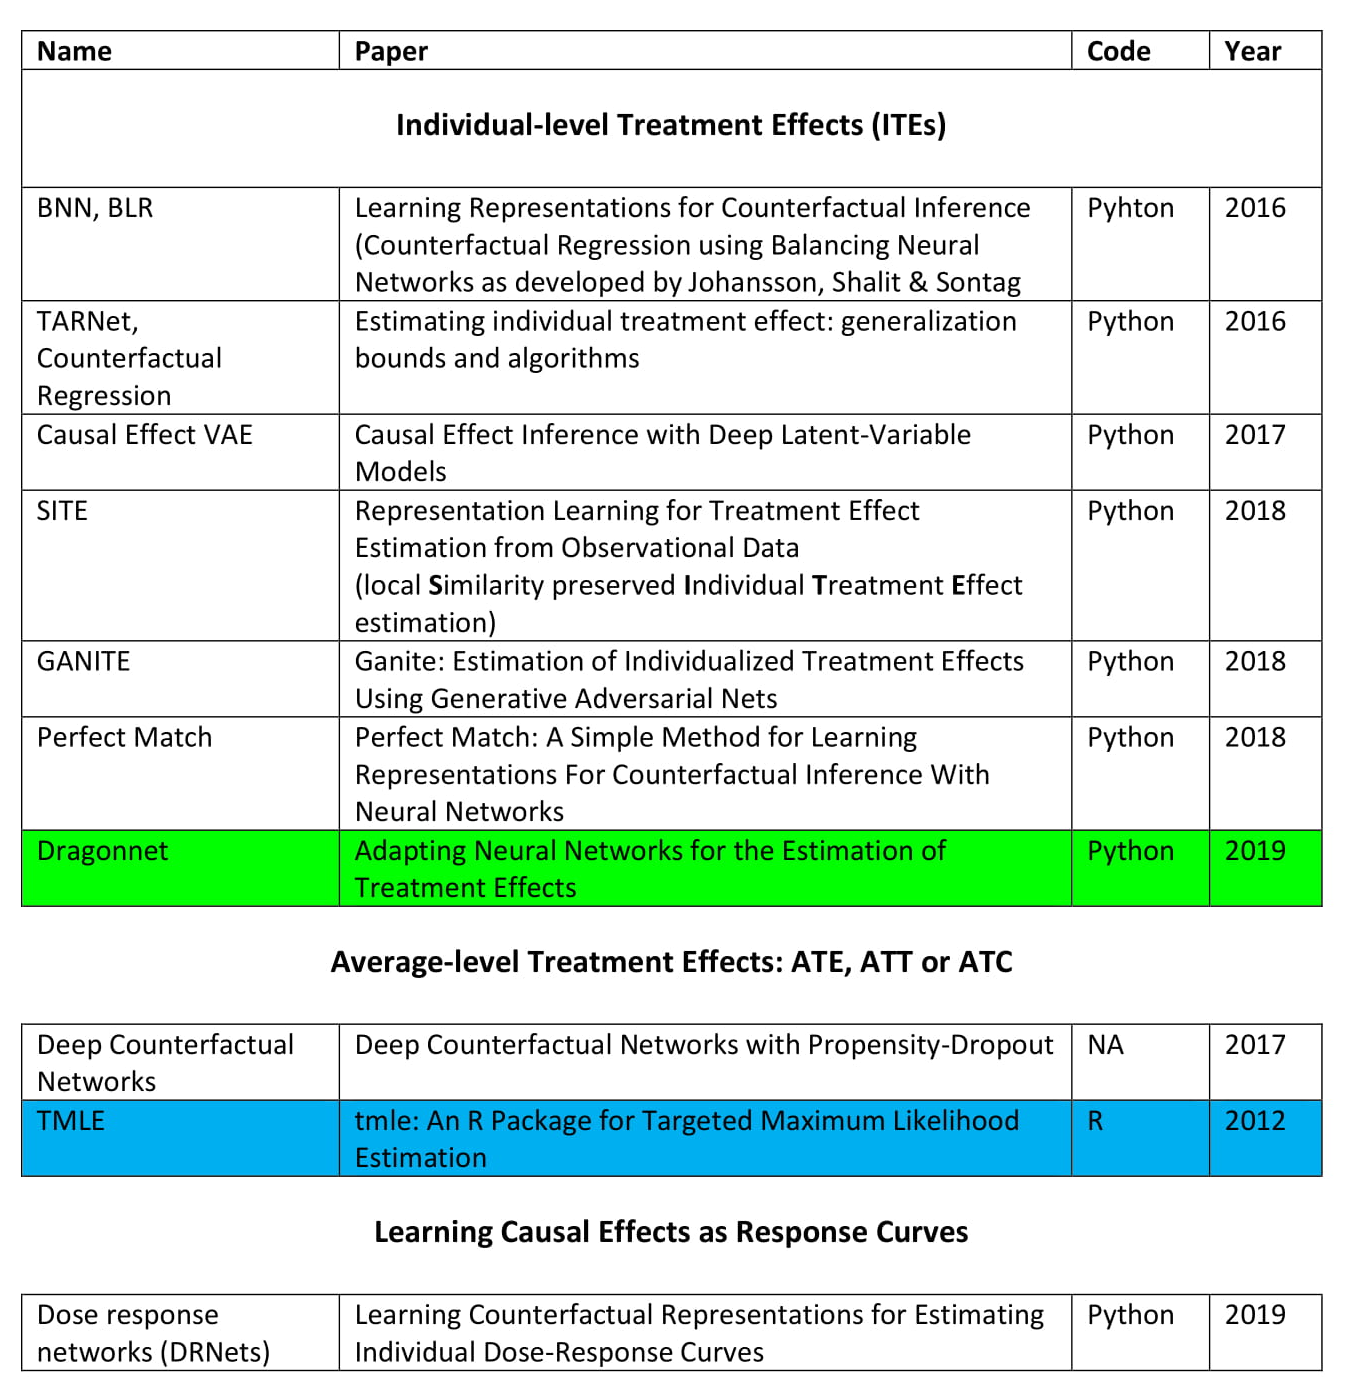

# 4.Motivation for DRAGONNET

#4 .Motivation for DRAGONNET
We looked at several state-of-the-art causal neural networks for average treatment estimation before deciding on Dragonnet to present in our tutorial. Dragonnet is an extension to a 2-headed approach called TARNEt.
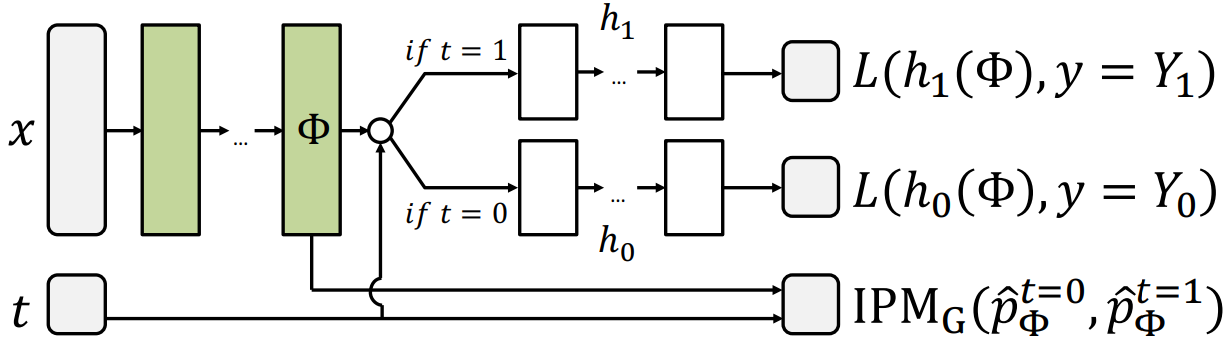

We won’t dive into TARNEt, but as you can see it is similar to the 2 model approach with the usage of 2 neural networks for different conditions. (t=0 & t=1) However it introduces IPMg as a distance measure between p(x|t = 0) and p(x|t = 1), as you know 2 model approach doesn’t take probability discrepancies into account. Dragonnet solves the same problem with different and comparably better results. (Shi et al.) reports the following results:
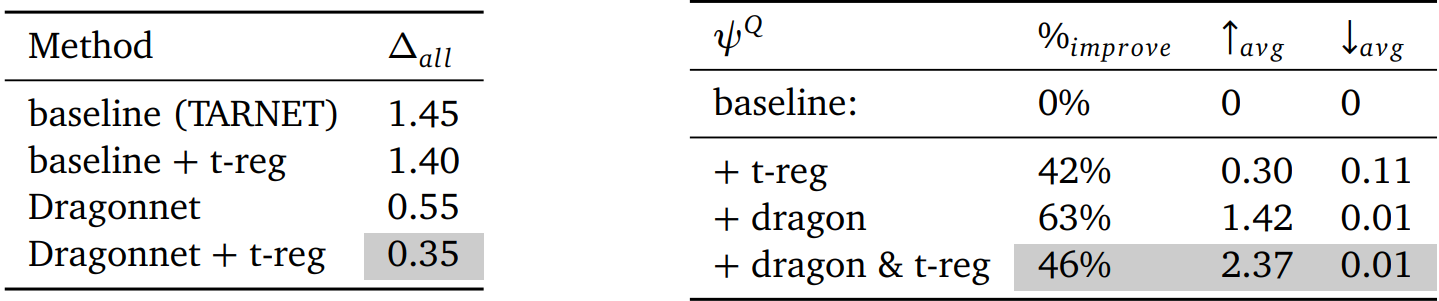
Where ∆ denotes mean absolute error for treatment estimation. We will talk about t-reg after Dragonnet, which is a modification to the objective function used for network training. We chose the sophisticated Dragonnet approach because of its superior predictive properties and remarkably better reported results with semi-synthetic datasets. (IHDP and ACIC18) This improvement is due to the idea behind the Dragonnet:
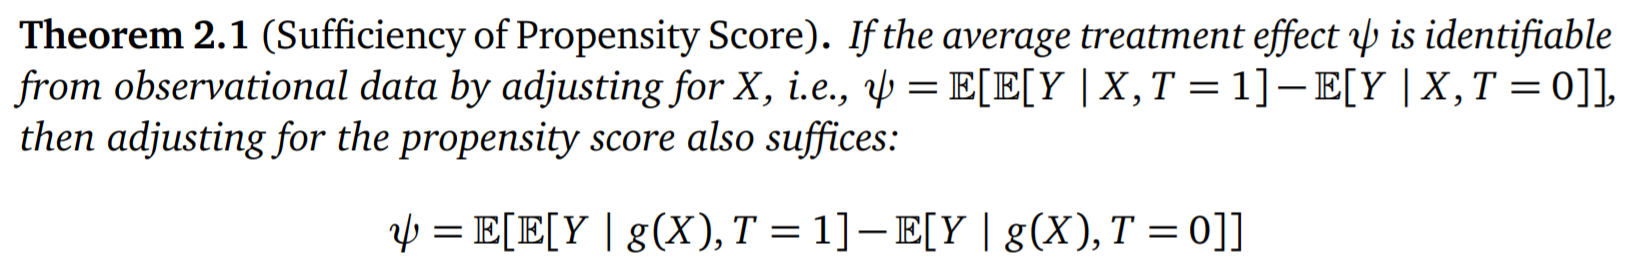

This means we only use the covariates in X, which are relevant to propensity score estimation.(even though this may deteriorate our outcome estimates) The parts in X, which are relevant for outcome estimation but not for treatment estimation, are irrelevant for causal effect and conditioning on these parts hurt finite-sample performance. In a related matter, there is evidence that Dragonnet estimates treatment effect better than TARNET, but is inferior at predicting outcome.


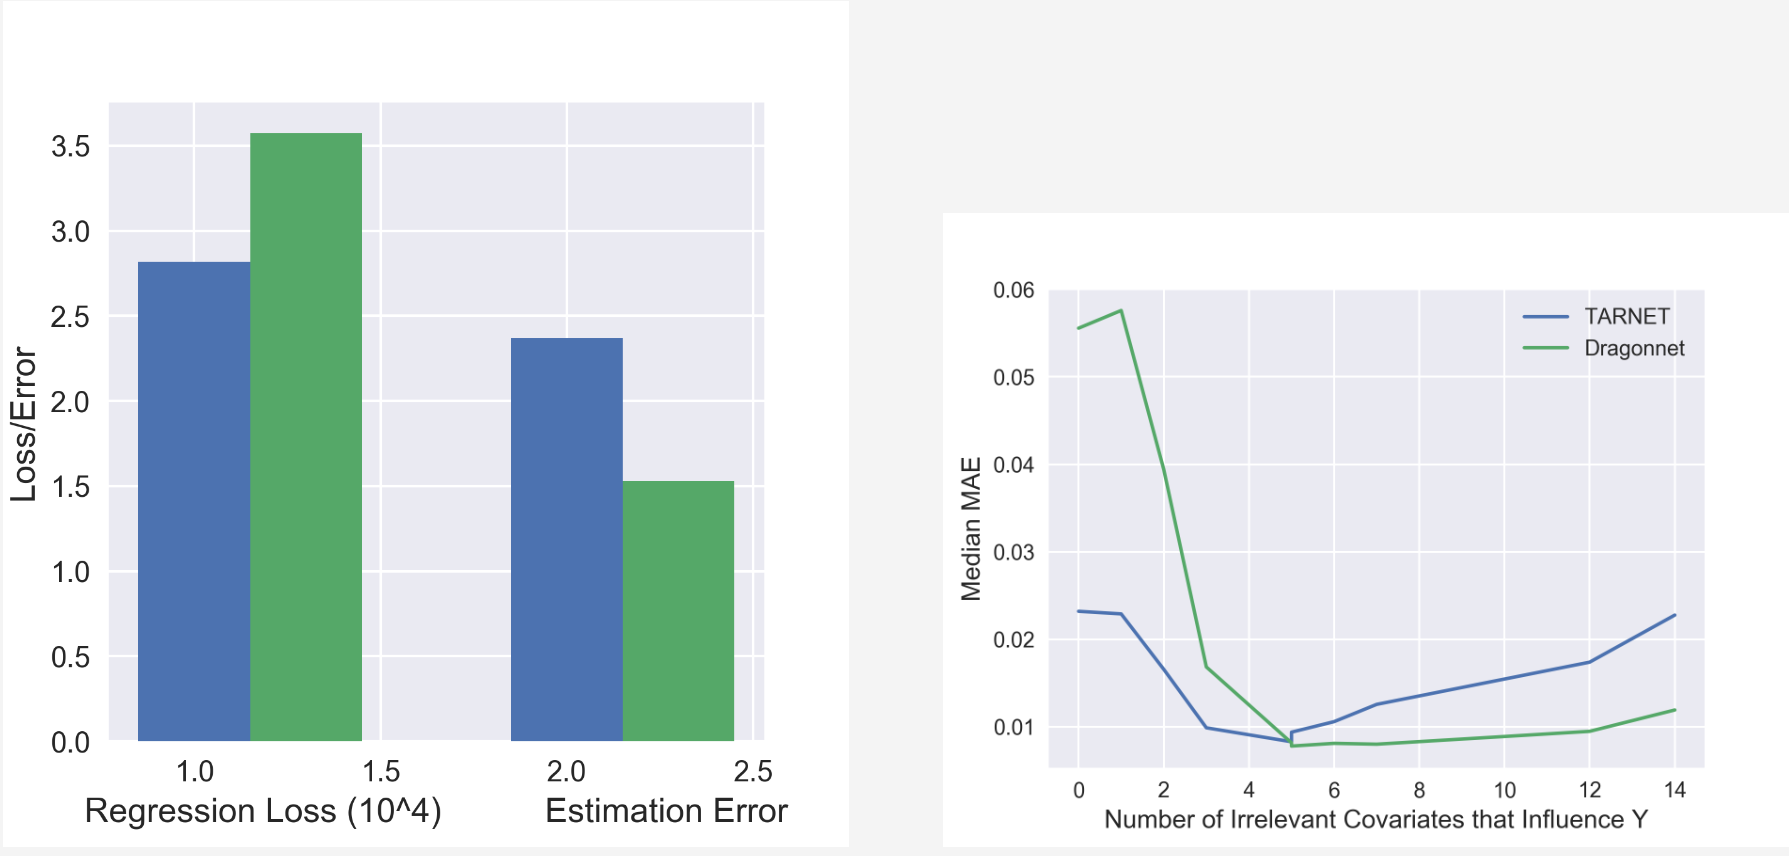

# 5.DRAGONNET

Dragonnet is a novel method to improve CATE estimation. It does so by trying to optimize predictions of outcome and propensity score at the same time. We first create a representation layer using a deep net. Representation layer contains processed information with most important task-specific features and connections from a given data set. We use this representation layer to predict both outcomes and treatment. The idea is that the input of the last layer of NN for treatment estimation (representation layer) contains only relevant and important information for output estimation.Therefore, feeding outcome prediction models with representation layer gives much better results than using raw data. We use a simple linear map (sigmoid) for treatment prediction, which gives us propensity score ˆg and couples the representation layer tightly to these estimated propensity scores. Meanwhile we feed the information from the representation layer to 2 hidden layer NNs for each of the outcome models
$ \hat Q(0,.) \& \hat Q(1,.) $
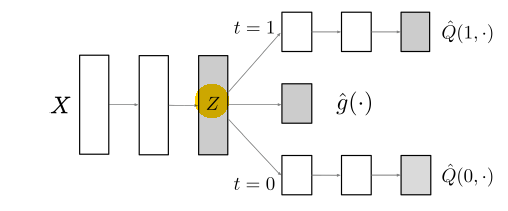

On the figure above you can see the three headed structure of Dragonnet with parameters and output heads Q(ti, xi ;) and g^(xi;). We train this model (only one outcome model for each sampling unit) by minimizing the objective function:
$$\hat\theta = argmin\hat R(\theta;X),$$ where
$$\hat R(\theta;X)=\frac{1}{n}\sum_i[Q^{nn}(t_i,xi;\theta)-y_i)^2+\alpha CrossEntropy(g^{nn}(x_i;\theta),t_i)]$$
With the help of two outcome model Q, we can estimate treatment effect with a downstream estimator such as the one below:

$$\hat\psi^Q=\frac{1}{n}\sum_i[\hat Q(1,x_i)-\hat Q(0,x_i)]$$
After observing empirical evidence, it was confirmed that Dragonnet trade off treatment prediction accuracy for the sake of better estimation of propensity score.

## Neural Network Loss Functions

In [25]:
# Pd_to_Np

def convert_pd_to_np(*args):
    output = [obj.to_numpy() if hasattr(obj, "to_numpy") else obj for obj in args]
    return output if len(output) > 1 else output[0]

In [26]:
# Binary Classification Loss Function
#Implements a classification (binary cross-entropy) loss function for DragonNet architecture,
#gives us a measure for treatment estimation.(propensity score estimation)

def binary_classification_loss(concat_true, concat_pred):
  ''' 
    Args:
        - concat_true (tf.tensor): tensor of true samples, with shape (n_samples, 2)
                                   Each row in concat_true is comprised of (y, treatment)
        - concat_pred (tf.tensor): tensor of predictions, with shape (n_samples, 4)
                                   Each row in concat_pred is comprised of (y0, y1, propensity, epsilon)
    Returns:
        - (float): binary cross-entropy loss ''' 
  t_true = concat_true[:, 1]
  t_pred = concat_pred[:, 2]
  t_pred = (t_pred + 0.001) / 1.002
  losst = tf.reduce_sum(K.binary_crossentropy(t_true, t_pred))

  return losst

In [27]:
#Regression Loss Function


#Define loss function for outcome predictions. 

def regression_loss(concat_true, concat_pred):
   

    y_true = concat_true[:, 0]
    t_true = concat_true[:, 1]

    y0_pred = concat_pred[:, 0]
    y1_pred = concat_pred[:, 1]

    loss0 = tf.reduce_sum((1. - t_true) * tf.square(y_true - y0_pred))
    loss1 = tf.reduce_sum(t_true * tf.square(y_true - y1_pred))

    return loss0 + loss1

We set regression loss of each outcome prediction to be the sum of squared error. Then we calculate binary classification loss caused by treatment estimation using cross entropy formula.
$$\hat\theta = argmin\hat R(\theta;X),$$ where
$$\hat R(\theta;X)=\frac{1}{n}\sum_i[Q^{nn}(t_i,xi;\theta)-y_i)^2+\alpha CrossEntropy(g^{nn}(x_i;\theta),t_i)]$$
Above you can see the formula for objective function of Dragonnet without using targeted regularization. It consists of sum of squared error of both outcomes plus binary classification loss times a parameter called alpha. (In our code we set alpha=1)

In [28]:
# Dragonnet Loss Function
#Define the loss function that will be optimized by dragonnet if targeted regularization is not used.This function aggregated the binary and regression losts  
#This function is an input to targeted regularization if targeted regularization is chosen

def dragonnet_loss_binarycross(concat_true, concat_pred):
   
    return regression_loss(concat_true, concat_pred) + binary_classification_loss(concat_true, concat_pred)

In [29]:

# Treatment Accuracy

#Define a function to calculate how good we classify for treatment. (binary classification)
def treatment_accuracy(concat_true, concat_pred):
   
    t_true = concat_true[:, 1]
    t_pred = concat_pred[:, 2]
    return binary_accuracy(t_true, t_pred) 

## Targeted Regularization Functions

Targeted regularization is a method to assure our downstream treatment effect estimator has good asymptotic properties (e.g. robustness, efficiency) by altering objective function. Our new objective function becomes:

$$\hat\theta,\hat\varepsilon=\mathop{argmin}_{\theta,\varepsilon}[\hat R(\theta;X)+\beta\frac{1}{n}\sum_i\gamma(y_i,t_i,x_i,\theta,\varepsilon)]$$

Newly added regularization term is defined by the functions:
$$\tilde Q(t_i,x_i,\theta,\varepsilon)=Q^{nn}(t_i,x_i;\theta)+\varepsilon[\frac{t_i}{g^{nn}(x_i;\theta)}-\frac{1-t_i}{1-g^{nn}(x_i; \theta)}] \\ \gamma(y_i,t_i,x_i;\theta,\varepsilon)=(y_i,\tilde Q(t_i,x_i;\theta,\varepsilon))^2.$$

Here you can see that, we have a new parameter called epsilon. Afterwards we define the outcome and treatment effect estimators as follows:
$$\hat\psi^{treg}=\frac{1}{n}\sum_i\hat Q^{treg}(1;x_i)-\hat Q^{treg}(0,x_i), \hspace{1cm} where \\ \hat Q{treg}= \tilde Q(\cdot,\cdot;\hat\theta,\hat\varepsilon).$$

These changes in our estimator and objective function ensures that our estimator is robust and efficient. We can tell this by looking if Q and g are consistent estimators and if Q g and treatment effect estimators satisfy the non-parametric estimating equation:
$$0=\frac{1}{n}\sum_i\varphi(y_i,t_i,x_i;\hat Q, \hat g,\hat\psi),$$

where $\varphi$ is the efficient influence curve of $\psi$,
$$\varphi(y,t,x;Q,g,\psi)=Q(1,x)-Q(0,x)+\left(\frac{t}{g(x)}-\frac{1-t}{1-g(x)}\right) \{ y-Q(t,x) \}-\psi$$

[1]Chernozhukov et al.[Che+17b] and van der Laan and Rose[vR11]


In [30]:
#Track Epsilon

def track_epsilon(concat_true, concat_pred):
   
    epsilons = concat_pred[:, 3]
    return tf.abs(tf.reduce_mean(epsilons))

In [31]:
# Targeted Regularization Loss Function

def make_tarreg_loss(ratio=1., dragonnet_loss=dragonnet_loss_binarycross):

    def tarreg_ATE_unbounded_domain_loss(concat_true, concat_pred):
        
        vanilla_loss = dragonnet_loss(concat_true, concat_pred)

        y_true = concat_true[:, 0]
        t_true = concat_true[:, 1]

        y0_pred = concat_pred[:, 0]
        y1_pred = concat_pred[:, 1]
        t_pred = concat_pred[:, 2]

        epsilons = concat_pred[:, 3]
        t_pred = (t_pred + 0.01) / 1.02
        # t_pred = tf.clip_by_value(t_pred,0.01, 0.99,name='t_pred')

        y_pred = t_true * y1_pred + (1 - t_true) * y0_pred

        h = t_true / t_pred - (1 - t_true) / (1 - t_pred)

        y_pert = y_pred + epsilons * h
        targeted_regularization = tf.reduce_sum(tf.square(y_true - y_pert))

        # final
        loss = vanilla_loss + ratio * targeted_regularization
        return loss

    return tarreg_ATE_unbounded_domain_loss

In [32]:
# Epsilon Layer

class EpsilonLayer(Layer):
    
    def __init__(self):
        
        super(EpsilonLayer, self).__init__()

    def build(self, input_shape):
        
        self.epsilon = self.add_weight(name='epsilon',
                                       shape=[1, 1],
                                       initializer='RandomNormal',
                                       trainable=True)
        super(EpsilonLayer, self).build(input_shape)

    def call(self, inputs, **kwargs):
        return self.epsilon * tf.ones_like(inputs)[:, 0:1]

## DragonNet Class

We first get the necessary arguments for neural network creation and a binary input indicating if we are working with targeted regularization loss function. We talked about this architecture above, we use functional keras layers stacked on top of each other. Firstly, we create the hidden shared layers for representation learning. This representation will be used for two outcome models, which consist of 3 dense layers each, as well as for treatment estimation. For treatment estimations we use a single layer with sigmoid activation function.
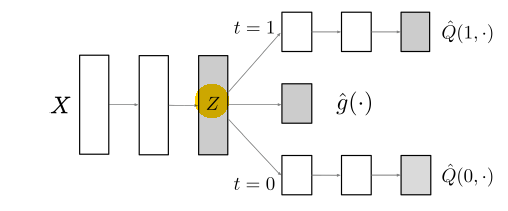

In [33]:
def make_dragonnet(X, y, X_val,y_val, params):
    
    treatment = y['T']
    y = y['Y']
    
    treatment_val = y_val['T']
    y_val = y_val['Y']
     
    inputs = Input(shape=(X.shape[1],), name='input')
        
    # representation
    x = Dense(units=params['neurons_per_layer'], activation='elu', kernel_initializer='RandomNormal')(inputs)
    x = Dense(units=params['neurons_per_layer'], activation='elu', kernel_initializer='RandomNormal')(x)
    x = Dense(units=params['neurons_per_layer'], activation='elu', kernel_initializer='RandomNormal')(x)

    t_predictions = Dense(units=1, activation='sigmoid')(x)

        # HYPOTHESIS
    y0_hidden = Dense(units=int(params['neurons_per_layer']),
                      activation='elu',
                      kernel_regularizer=regularizers.l2(params['reg_l2']))(x)
    y1_hidden = Dense(units=int(params['neurons_per_layer']),
                      activation='elu',
                      kernel_regularizer=regularizers.l2(params['reg_l2']))(x)

    # second layer
    y0_hidden = Dense(units=int(params['neurons_per_layer']),
                      activation='elu',
                      kernel_regularizer=regularizers.l2(params['reg_l2']))(y0_hidden)
    y1_hidden = Dense(units=int(params['neurons_per_layer']),
                      activation='elu',
                      kernel_regularizer=regularizers.l2(params['reg_l2']))(y1_hidden)

        # third
    y0_predictions = Dense(units=1,
                           activation=None,
                           kernel_regularizer=regularizers.l2(params['reg_l2']),
                           name='y0_predictions')(y0_hidden)
    y1_predictions = Dense(units=1,
                           activation=None,
                           kernel_regularizer=regularizers.l2(params['reg_l2']),
                           name='y1_predictions')(y1_hidden)
    if params['targeted_reg']:
        dl = EpsilonLayer()
        epsilons = dl(t_predictions, name='epsilon')
        concat_pred = Concatenate(1)([y0_predictions, y1_predictions, t_predictions, epsilons])
    else : 
        concat_pred = Concatenate(1)([y0_predictions, y1_predictions, t_predictions])
        
    model = Model(inputs=inputs, outputs=concat_pred)
      
        
#         Fits the DragonNet model.
#         Args:
#             X (np.matrix or np.array or pd.Dataframe): a feature matrix
#             treatment (np.array or pd.Series): a treatment vector
#             y (np.array or pd.Series): an outcome vector
        
    X, treatment, y = convert_pd_to_np(X, treatment, y)
    
    X_val, treatment_val, y_val = convert_pd_to_np(X_val,treatment_val, y_val)

    y = np.hstack((y.reshape(-1, 1), treatment.reshape(-1, 1)))
    
    y_val = np.hstack((y_val.reshape(-1, 1), treatment_val.reshape(-1, 1)))
    

    metrics = [regression_loss, binary_classification_loss, treatment_accuracy]
        
    #We choose which loss function to use (with or without targeted regularization)
  
    if params['targeted_reg']:
        loss = make_tarreg_loss(ratio=params['ratio'], dragonnet_loss=params['loss_func'])
    else:
        loss = params['loss_func']
  
    model.compile(optimizer=Adam(lr=params['learning_rate']),loss=loss, metrics=metrics)
  
    
#     adam_callbacks = [
#             TerminateOnNaN(),
#             EarlyStopping(monitor='val_loss', patience=50, min_delta=0.),
#             ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=False, mode='auto',
#                               min_delta=1e-8, cooldown=0, min_lr=0)]
    

    out = model.fit(X, y,
#                 callbacks=adam_callbacks,
                validation_data=(X_val, y_val),
                epochs=params['epochs'],
                batch_size=params['batch_size'],
                verbose=False)
        
    return out, model

#Calls predict on fitted DragonNet.Returns: (np.array): a 2D array with shape (X.shape[0], 4),
#where each row takes the form of (outcome do(t=0), outcome do(t=1), propensity, epsilon)
       
def predict(X, model):
    return model.predict(X)

    
      

def predict_propensity(X, model):
    #Predicts the individual propensity scores.
    preds = predict(X, model)
    return preds[:, 2]

        
#Predicts the individual treatment effect (tau / "ITE"). Args: X (np.matrix or np.array or pd.Dataframe): a feature matrix
#Returns: (np.array): treatment effect vector
def predict_tau(X, model):  
    preds = model.predict(X)
    return (preds[:, 1] - preds[:, 0]).reshape(-1, 1)


# Fits the DragonNet model and then predicts.
# Args:
#             X (np.matrix or np.array or pd.Dataframe): a feature matrix
#             treatment (np.array or pd.Series): a treatment vector
#             y (np.array or pd.Series): an outcome vector
#             return_components (bool, optional): whether to return
# Returns:
#             (np.array): predictions based on return_components flag
#                 if return_components=False (default), each row is treatment effect
#                 if return_components=True, each row is (outcome do(t=0), outcome do(t=1), propensity, epsilon)

def fit_predict(X, y, X_val, y_val, params):
    
    out,model = make_dragonnet(X, y, X_val, y_val, params)
    return out, model

# 6.RESULTS

In [34]:
%%R 
install.packages('data.table')
decompose <- function(r_Obj){ 
    library(data.table)
    scores = r_Obj[,1]
    Y = r_Obj[,2]
    W = r_Obj[,3]
    return(list(scores, Y, W))}
### QINI SCORE (propensity corrected)
qini_score <- function(scores, Y, W, p_treatment=0.5, groups = 20, plotit=TRUE){
  if(length(unique(lengths(list(scores, Y, W)))) != 1){
    stop("input scores, Y, W must have same length")
  }
  
  # mm matrix to contain scores, deciles, observed response and experiment group indicator
  mm <- cbind(tau_hat = scores, y = Y, ct = W, tau_hat_rank = rank(-scores), prop_score = p_treatment)
  bk <- unique(quantile(mm[, "tau_hat_rank"], probs = seq(0, 1, 1/groups)))
  if ((length(bk) - 1) != groups){
    warning("uplift: due to ties in uplift predictions, the number of groups is less than ", 
            groups)
    groups <- length(bk)-1
  }
  
  mm <- cbind(mm, decile = cut(mm[, "tau_hat_rank"], breaks = bk, labels = NULL, 
                               include.lowest = TRUE))
  
  mm <- data.table(mm)
  setorder(mm, ct,decile)
  
  # ATE per decile
  #uplift <- mm[, .(uplift=calc_ATE(y = y, g = ct, prop_score = prop_score)),by=decile]
  
  # No. of positive responses and group size
  #deciles <- mm[, .(y1=sum(y), n=.N),by=.(decile, ct)]
  # No. of positive responses and group size, corrected for propensity score
  deciles <- mm[, .(y1=sum(y/prop_score), n=sum(1/prop_score)),by=.(decile, ct)]
  # Ratio of positve responses in each decile relative to total number of positive responses in exp. group
  deciles[, inc.y1.ratio := y1/sum(n), by=ct]
  # Incremental gain in positive responses (as difference to control group)
  inc.gains <- cumsum(deciles[ct==1, inc.y1.ratio] - deciles[ct==0, inc.y1.ratio])
  
  # # No. of positive responses per decile per experiment group
  # y1 <- tapply(mm[,"y"], INDEX = list(mm[,"ct"],mm[,"decile"]),sum)
  # # No. of observations per decile per experiment group
  # n <- tapply(mm[,"y"], INDEX = list(mm[,"ct"],mm[,"decile"]),length)
  # # Success ratio per decile per experiment group
  # r.y1 <- y1/n
  # # Uplift as difference in success ratio per decile (ATE per decile)
  # uplift <- r.y1["1",] - r.y1["0",]
  # 
  # # Relative increase in gains incrementally including group after group
  # inc.gains <- cumsum( (y1["1",]/sum(n["1",])) - y1["0",]/sum(n["0",]) )
  
  ####
  overall.inc.gains <- inc.gains[length(inc.gains)]
  
  random.inc.gains <- cumsum(rep(overall.inc.gains/groups, 
                                 groups))
  
  x_axis <- seq(1/groups, 1, 1/groups)
  y_axis <- inc.gains
  
  auuc <- 0
  for (i in 2:length(x_axis)) {
    auuc <- auuc + 0.5 * (x_axis[i] - x_axis[i-1]) * (y_axis[i] + y_axis[i-1])
  }
  
  y_axis.rand <- random.inc.gains
  auuc.rand <- 0
  for (i in 2:length(x_axis)) {
    auuc.rand <- auuc.rand + 0.5 * (x_axis[i] - x_axis[i-1]) * (y_axis.rand[i] + y_axis.rand[i - 1])
  }
  qini <- auuc - auuc.rand
  
  if(plotit){
    miny <- 100 * min(c(random.inc.gains, inc.gains))
    maxy <- 100 * max(c(random.inc.gains, inc.gains))
    
    plot(inc.gains * 100 ~ seq(100/groups, 100, 100/groups), 
         type = "b", col = "blue", lty = 2, xlab = "Proportion of population targeted (%)", 
         ylab = "Cumulative incremental gains (pc pt)", ylim = c(miny, 
                                                                 maxy) )#, ...)
    lines(random.inc.gains * 100 ~ seq(100/groups, 100, 100/groups), 
          type = "l", col = "red", lty = 1)
    #legend("topright", c("Model", "Random"), col = c("blue", 
    #                                                 "red"), lty = c(2, 1))
  }
  
  return(unname(qini))
}



R[write to console]: Installing package into 'C:/Users/Sezen/R/win-library/3.6'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---


R[write to console]: trying URL 'https://ftp.fau.de/cran/bin/windows/contrib/3.6/data.table_1.14.0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2551999 bytes (2.4 MB)

R[write to console]: downloaded 2.4 MB




package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sezen\AppData\Local\Temp\RtmpsDgxb9\downloaded_packages


Above you can see compared to two model approach how good Dragonnet treatment effect estimates are. In our generated data True ITE is either equal to 0 or 8, which is represented by dashed line in the graphic. As you can see Dragonnet estimates have a significantly lower variance and they are mostly stationed around the true values. Although we cannot confirm Dragonnet is better by looking at QINI curves, the scatter plot above shows Dragonnet is superior to two model approach for estimating treatment effects.

## IHDP dataset

In [1807]:
import econml
from econml.data.dgps import ihdp_surface_B

In [1808]:
Y, T, X, expected_te = ihdp_surface_B()

In [1809]:
data_ihdp=pd.DataFrame(np.column_stack([X, Y, T, expected_te]))
data_ihdp.rename(columns={26: "Y", 27: "T", 28:"treatment_effect"},inplace=True)
data_ihdp.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,Y,T,treatment_effect
0,1.0,-0.528957,-0.343685,1.129310,0.161811,-0.316815,1.296084,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.286179,1.0,6.476426
1,1.0,-1.738109,-1.803210,0.384085,2.245823,-0.629611,1.296084,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.379646,0.0,7.897983
2,1.0,-0.807992,-0.203082,-0.361140,-0.880195,0.809248,-0.526908,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.543576,0.0,7.547198
3,1.0,0.390344,0.596982,-1.851590,-0.880195,-0.004020,-0.858362,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.452570,0.0,5.232857
4,1.0,-1.045929,-0.603114,0.011473,0.161811,0.684130,-0.361182,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.042149,0.0,6.866833


In [1810]:
data_ihdp.shape

(747, 29)

### TWO MODEL

In [1862]:
X_treatment,Y_treatment,X_control,Y_control, X_test, Y_test, T_test, TE_test = train_test(data_ihdp, 'T','Y', data_ihdp.columns.tolist()[0:26], True, True)
X_treatment_, X_val_t, Y_treatment_, Y_val_t = train_test_split(X_treatment, Y_treatment, test_size=0.2)
X_control_, X_val_c, Y_control_, Y_val_c = train_test_split(X_control, Y_control, test_size=0.2)

In [1863]:
setseed()

In [1864]:
params = {'neurons_per_layer':150,
          'targeted_reg':False,
          'ratio':1.,
          'batch_size':16,
          'epochs':10,
          'learning_rate':0.009, 
          'reg_l2':0.05,
          'loss_func':dragonnet_loss_binarycross}

In [1865]:
ModelTwo_ihdp=TwoModel(X_treatment_, X_control_, Y_treatment_, Y_control_, X_val_t, Y_val_t, X_val_c, Y_val_c,params)
CATE_TwoModel_ihdp = ModelTwo_ihdp.predict(X_test)

In [1866]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_Obj = ro.conversion.py2rpy(pd.concat([pd.DataFrame(CATE_TwoModel_ihdp),pd.DataFrame(Y_test).reset_index(drop=True),pd.DataFrame(T_test).reset_index(drop=True)],axis=1))

[1] -0.380484


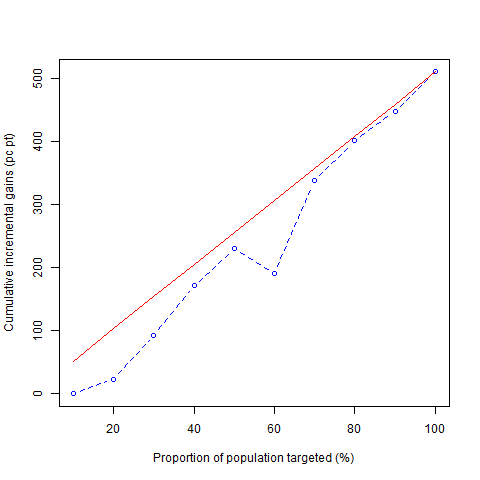

In [1867]:
%%R -i r_Obj

scores=unlist(decompose(r_Obj)[1])
Y=unlist(decompose(r_Obj)[2])
W=unlist(decompose(r_Obj)[3])
qini_score(scores, Y, W, 0.5, 10, TRUE)

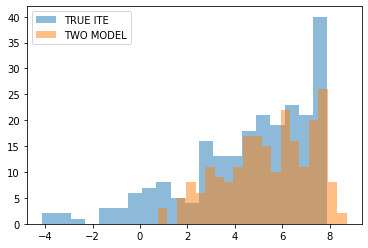

In [1868]:
from matplotlib import pyplot
pyplot.hist(TE_test, 20, alpha=0.5, label='TRUE ITE')
pyplot.hist(CATE_TwoModel_ihdp, 20, alpha=.5, label='TWO MODEL')
pyplot.legend(loc='upper left')
pyplot.show()

In [1869]:
np.mean(tf.square(TE_test.values - CATE_TwoModel_ihdp.reshape(CATE_TwoModel_ihdp.size,)))

1.8082987434091693

### DRAGONNET

In [1850]:
X_train, Y_train, T_train, X_test,Y_test, T_test, TE_test =  train_test(data_ihdp, 'T','Y', data_ihdp.columns.tolist()[0:26], False, True)

In [1851]:
X_train_, X_val, Y_train_, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [1852]:
params = {'neurons_per_layer':150,
          'targeted_reg':False,
          'ratio':1.,
          'batch_size':16,
          'epochs':10,
          'learning_rate':0.009, 
          'reg_l2':0.05,
          'loss_func':dragonnet_loss_binarycross}

In [1853]:
setseed()

In [1854]:
out, model = fit_predict(X_train_, Y_train_, X_val, Y_val, params)

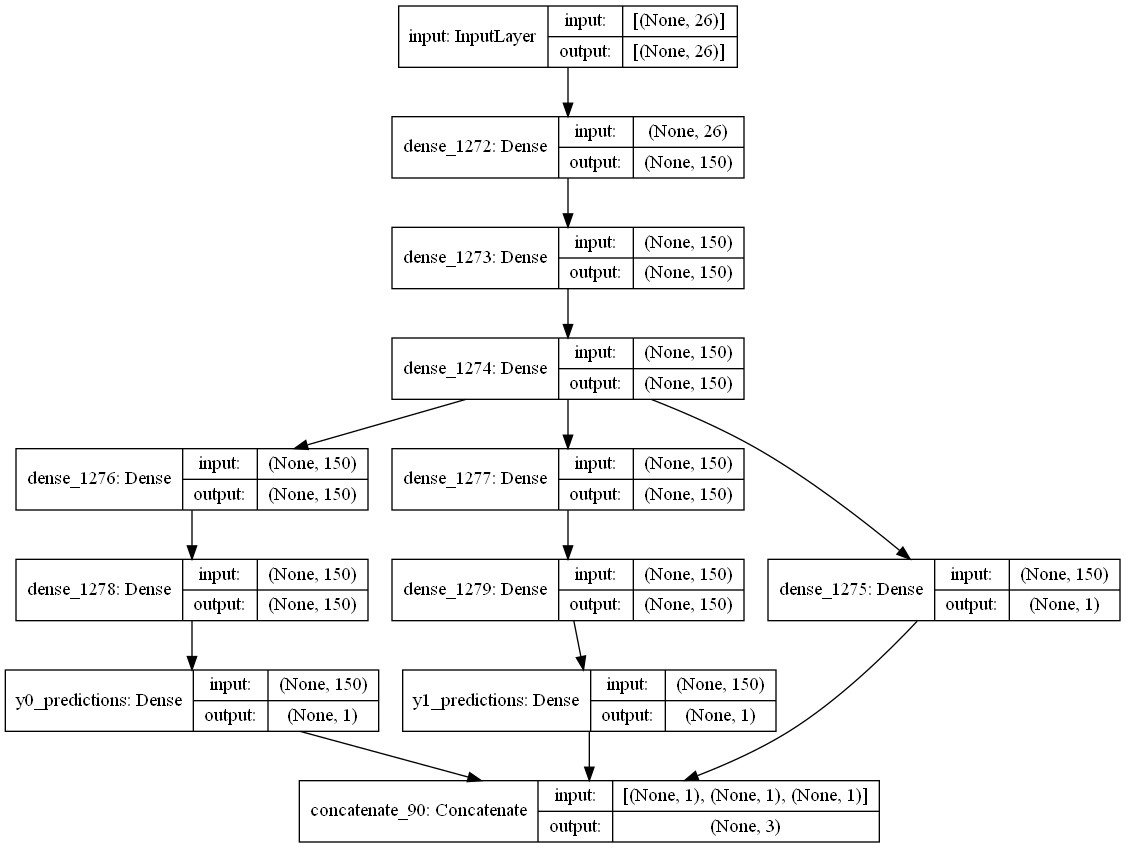

In [1873]:
import pydot
import graphviz
from keras.utils import plot_model
plot_model(model, to_file='Dragonnet.png', show_shapes=True, show_layer_names=True)

In [1855]:
CATE_Dragon_ihdp = predict_tau(X_test,model)

In [1856]:
out.history['val_loss'] # sum of squared errors

[162.962158203125,
 94.7461929321289,
 79.97541809082031,
 74.6767807006836,
 56.67341995239258,
 63.58723068237305,
 54.075706481933594,
 53.13426208496094,
 51.704647064208984,
 60.81467819213867]

In [1857]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_Obj = ro.conversion.py2rpy(pd.concat([pd.DataFrame(CATE_Dragon_ihdp),pd.DataFrame(Y_test).reset_index(drop=True),pd.DataFrame(T_test).reset_index(drop=True)],axis=1))

[1] -0.2664171


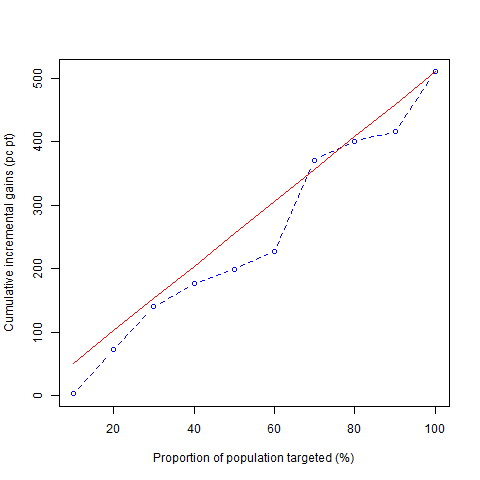

In [1858]:
%%R -i r_Obj

scores=unlist(decompose(r_Obj)[1])
Y=unlist(decompose(r_Obj)[2])
W=unlist(decompose(r_Obj)[3])
qini_score(scores, Y, W, 0.5, 10, TRUE)

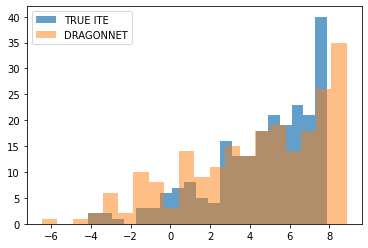

In [1859]:
from matplotlib import pyplot
pyplot.hist(TE_test, 20, alpha=0.7, label='TRUE ITE')
pyplot.hist(CATE_Dragon_ihdp, 20, alpha=.5, label='DRAGONNET')
pyplot.legend(loc='upper left')
pyplot.show()

In [1860]:
np.mean(tf.square(TE_test.values - CATE_Dragon_ihdp.reshape(225,)))

1.1693712548556419

In [1870]:
True_ITE= TE_test.values.reshape(TE_test.size,1)
mse= np.mean(tf.square(CATE_Dragon_ihdp - True_ITE))
mse_2model= np.mean(tf.square(CATE_TwoModel_ihdp - True_ITE))
TE_test = TE_test.reset_index(drop=True)
z=pd.concat([TE_test, pd.DataFrame(CATE_TwoModel_ihdp)], axis=1)
z.rename(columns={ z.columns[1]: "CATE_TwoModel_ihdp"}, inplace=True)
z=pd.concat([z, pd.DataFrame(CATE_Dragon_ihdp)], axis=1)
z.rename(columns={z.columns[2]: 'CATE_Dragon_ihdp'}, inplace=True)
z.sort_values(by='treatment_effect', inplace=True)
z.reset_index(inplace=True)

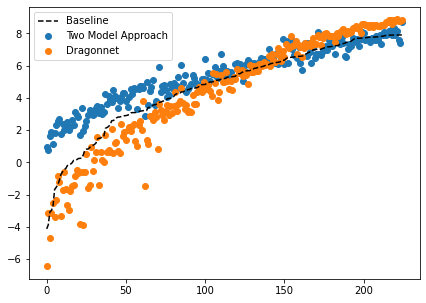

In [1871]:
### Comparison plot of 2 model and Dragonnet
from matplotlib import pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(np.arange(0,TE_test.size,1), z['treatment_effect'], color='black', ls='--', label='Baseline')
plt.scatter(np.arange(0,TE_test.size,1), z['CATE_TwoModel_ihdp'], label="Two Model Approach")
plt.scatter(np.arange(0,TE_test.size,1), z['CATE_Dragon_ihdp'], label="Dragonnet")
plt.legend()

In [312]:
p = {'neurons_per_layer':[150,200,300],
          'targeted_reg':[False],
          'rtio':[1.],
          'val_split':[0.25,],
          'batch_size':[16,32],
          'epochs':[10,25,50,],
          'learning_rate':[0.07,0.003,0.009,0.005,],
          'reg_l2':[0.01,0.001,0.005],
          'loss_func':[dragonnet_loss_binarycross]}

In [313]:
setseed()

In [314]:
scan_object = talos.Scan(x=X_train_,
                         y=Y_train_,
                         params=p,
                         x_val = X_val,
                         y_val = Y_val,
                         model=make_dragonnet,
                         experiment_name = 'dragonnet',
                         random_method='quantum')

100%|████████████████████████████████████████████████████████████████| 216/216 [21:16<00:00,  5.91s/it]


# Fashion dataset

In [1754]:
data_fashion=pd.read_csv("fashionB_clean_linear.csv")
# print(data_fashion.head()) # data_fashion.info()
data_fashion.rename(columns={"TREATMENT": "T", "checkoutAmount": "Y","TREATMENT_EFFECT_RESPONSE": "treatment_effect"}, inplace=True)

In [1755]:
ATE = data_fashion.loc[data_fashion['T']==1,'Y'].mean()-data_fashion.loc[data_fashion['T']==0,'Y'].mean()
ATE

4.650118011360862

In [1757]:
#add or delete the columns to get the runs 
fashion_cols = ['DurationLastVisitInSeconds','TimeSpentOnoverview','SecondsFor3','TimeSpentOnproduct',
                'MonetaryValueOfPreviousSessions','SessionTimeInSeconds','ScreenWidth','TimeSpentOnsale',
               'NormalizedCartSum','ViewCountLastVisit','TimeSpentOnsearch','TotalClickCount','ClicksPerproduct',
               'ViewsOnproduct','PageIsproduct','ClicksOnLastScreenCount','TriggerEventsSinceLastOnThisPage','DayOfWeek5',
               'NumberOfDifferentoverview','ChannelIsSEARCH','DayOfWeek7','IsMobile','PageIsoverview',
                'TriggerEventsSinceLastOnThisScreenType','HourOfDay3hBlock3','HourOfDay3hBlock4','DayOfWeek3','ViewsOnsale',
               'CartQuantity','MonetaryDiscountValueOfPreviousSessions','InitPageWashome','HasConfirmedBefore',
               'WasConvertedBefore','SameAsPreviousPrevious','PreviousVisitCount','NumberOfDifferentproduct',
               'ViewsOnoverview', 'HasAbortedBefore','HourOfDay3hBlock6','ChannelIsEMAIL','DayOfWeek6','DayOfWeek2',
               'VisitCountLastWeek','PageIshome','HourOfDay3hBlock7','VisitorKnown','HourOfDay3hBlock5', 'InitCartNonEmpty',
               'InitPageWassale','RepeatCount']


In [1758]:
data_fashion = pd.concat([data_fashion[['T','Y','treatment_effect']], data_fashion[fashion_cols]], axis=1)

In [1759]:
#find the covariates that affect treatment assignment
with pd.option_context("display.max_rows", 1000):
    display(pd.Series.abs(data_fashion[data_fashion['T']==1].mean()-data_fashion[data_fashion['T']==0].mean()).sort_values(ascending = False))

DurationLastVisitInSeconds                 37.350234
TimeSpentOnoverview                        23.741989
SecondsFor3                                15.835640
TimeSpentOnproduct                         11.099126
MonetaryValueOfPreviousSessions             9.932753
SessionTimeInSeconds                        8.723317
Y                                           4.650118
T                                           1.000000
ScreenWidth                                 0.671956
TimeSpentOnsale                             0.293391
NormalizedCartSum                           0.210847
ViewCountLastVisit                          0.071579
TimeSpentOnsearch                           0.034453
treatment_effect                            0.018476
TotalClickCount                             0.017059
ClicksPerproduct                            0.007109
ViewsOnproduct                              0.006773
PageIsproduct                               0.006632
ClicksOnLastScreenCount                     0.

In [1760]:
nonbool_cols = [col for col in data_fashion if not
               data_fashion[col].dropna().value_counts().index.isin([0,1]).all()]

bool_cols = [col for col in data_fashion if 
               data_fashion[col].dropna().value_counts().index.isin([0,1]).all()]

### Two Model

In [1761]:
X_treatment,Y_treatment,X_control,Y_control, X_test, Y_test, T_test, TE_test = train_test(data_fashion,'T','Y',
                                                                                       fashion_cols,
#                                                                                         data_fashion.columns[2:-4].tolist(), 
                                                                                        True, True)
X_treatment_, X_val_t, Y_treatment_, Y_val_t = train_test_split(X_treatment, Y_treatment, test_size=0.2)
X_control_, X_val_c, Y_control_, Y_val_c = train_test_split(X_control, Y_control, test_size=0.2)

In [1762]:
X_treatment_copy = X_treatment_
X_control_copy = X_control_
X_val_t_copy = X_val_t
X_val_c_copy = X_val_c
X_test_copy = X_test

In [1763]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(pd.concat([X_treatment_,X_control_])[nonbool_cols[2:]])

X_treatment_[nonbool_cols[2:]] = min_max_scaler.transform(X_treatment_[nonbool_cols[2:]])
X_control_[nonbool_cols[2:]] = min_max_scaler.transform(X_control_[nonbool_cols[2:]])
X_val_t[nonbool_cols[2:]] = min_max_scaler.transform(X_val_t[nonbool_cols[2:]])
X_val_c[nonbool_cols[2:]] = min_max_scaler.transform(X_val_c[nonbool_cols[2:]])
X_test[nonbool_cols[2:]] = min_max_scaler.transform(X_test[nonbool_cols[2:]])

# comment out this part if you would like to train without boolean features
X_treatment_ = pd.concat([X_treatment_, X_treatment_copy[bool_cols[1:]]], axis=1)
X_control_ = pd.concat([X_control_, X_control_copy[bool_cols[1:]]], axis=1)
X_val_t = pd.concat([X_val_t, X_val_t_copy[bool_cols[1:]]], axis=1)
X_val_c = pd.concat([X_val_c, X_val_c_copy[bool_cols[1:]]], axis=1)

X_test = pd.concat([X_test, X_test_copy[bool_cols[1:]]], axis=1)

In [1764]:
setseed()

In [1765]:
params = {'neurons_per_layer':210,
          'batch_size':16,
          'epochs':20,
          'learning_rate':0.00008, 
          'reg_l2':0.005,
          'loss_func':dragonnet_loss_binarycross}

In [1766]:
ModelTwo_Fashion=TwoModel(X_treatment_, X_control_, Y_treatment_, Y_control_, X_val_t, Y_val_t, X_val_c, Y_val_c,params)


In [1767]:
CATE_TwoModel_Fashion = ModelTwo_Fashion.predict(X_test)

In [1768]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_Obj = ro.conversion.py2rpy(pd.concat([pd.DataFrame(CATE_TwoModel_Fashion),pd.DataFrame(Y_test).reset_index(drop=True),pd.DataFrame(T_test).reset_index(drop=True)],axis=1))

[1] 0.458214


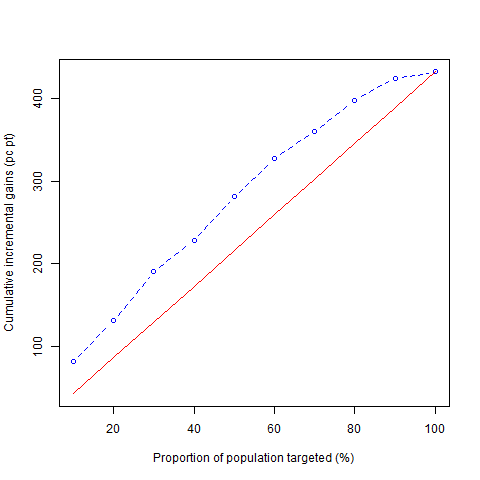

In [1769]:
%%R -i r_Obj

scores=unlist(decompose(r_Obj)[1])
Y=unlist(decompose(r_Obj)[2])
W=unlist(decompose(r_Obj)[3])
qini_score(scores, Y, W, 0.5, 10, TRUE)

In [1770]:
np.mean(tf.square(TE_test.values - CATE_TwoModel_Fashion.reshape(CATE_TwoModel_Fashion.size,)))

17.962908820082298

### DragonNet

In [1771]:
X_train, Y_train, T_train, X_test, Y_test, T_test,TE_test = train_test(data_fashion,'T','Y',
                                                                       fashion_cols,
#                                                                        data_fashion.columns[2:-4].tolist(),
                                                                       False, True)

In [1772]:
X_train_, X_val, Y_train_, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state = 42)

In [1773]:
X_train_copy = X_train_
X_val_copy = X_val
X_test_copy = X_test

In [1774]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train_[nonbool_cols[2:]])

X_train_[nonbool_cols[2:]] = min_max_scaler.transform(X_train_[nonbool_cols[2:]])
X_val[nonbool_cols[2:]] = min_max_scaler.transform(X_val[nonbool_cols[2:]])
X_test[nonbool_cols[2:]] = min_max_scaler.transform(X_test[nonbool_cols[2:]])

# comment out this part if you would like to train without boolean features
X_train_ = pd.concat([X_train_, X_train_copy[bool_cols[1:]]], axis=1)
X_val = pd.concat([X_val, X_val_copy[bool_cols[1:]]], axis=1)
X_test = pd.concat([X_test,X_test_copy[bool_cols[1:]]], axis=1)

In [1784]:
params = {'neurons_per_layer':210,
          'targeted_reg':False,
          'ratio':1.,
          'batch_size':16,
          'epochs':20,
          'learning_rate':0.00008, 
          'reg_l2':0.005,
          'loss_func':dragonnet_loss_binarycross}

In [1785]:
setseed()

In [1786]:
out, model = fit_predict(X_train_, Y_train_, X_val, Y_val, params)

In [1787]:
out.history['val_loss']

[12328.8662109375,
 12244.5341796875,
 12193.0166015625,
 12212.8486328125,
 12173.701171875,
 12173.5927734375,
 12158.7333984375,
 12148.5166015625,
 12120.5361328125,
 12124.3037109375,
 12132.525390625,
 12130.3037109375,
 12141.005859375,
 12105.4794921875,
 12134.443359375,
 12102.8310546875,
 12090.388671875,
 12105.1650390625,
 12113.728515625,
 12129.4716796875]

In [1788]:
CATE_Dragon_Fashion = predict_tau(X_test,model)

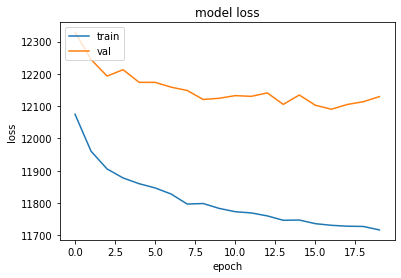

In [1789]:
from matplotlib import pyplot as plt

plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [1790]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_Obj = ro.conversion.py2rpy(pd.concat([pd.DataFrame(CATE_Dragon_Fashion),pd.DataFrame(Y_test).reset_index(drop=True),pd.DataFrame(T_test).reset_index(drop=True)],axis=1))

[1] 0.4198897


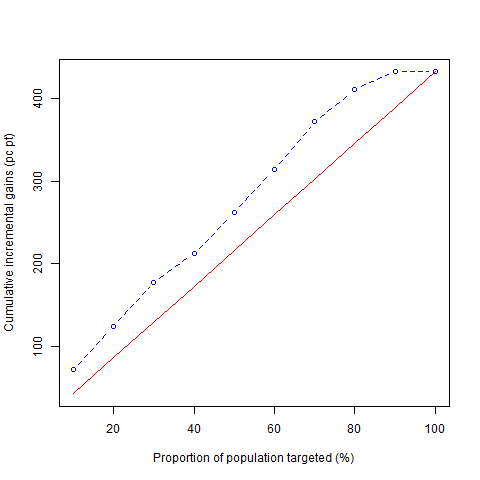

In [1791]:
%%R -i r_Obj

scores=unlist(decompose(r_Obj)[1])
Y=unlist(decompose(r_Obj)[2])
W=unlist(decompose(r_Obj)[3])
qini_score(scores, Y, W, 0.5, 10, TRUE)

In [1792]:
np.mean(tf.square(TE_test.values - CATE_Dragon_Fashion.reshape(CATE_Dragon_Fashion.size,)))

4.693322761587609

In [1793]:
True_ITE= TE_test.values.reshape(TE_test.size,1)
mse= np.mean(tf.square(CATE_Dragon_Fashion - True_ITE))
mse_2model= np.mean(tf.square(CATE_TwoModel_Fashion - True_ITE))
TE_test = TE_test.reset_index(drop=True)
z=pd.concat([TE_test, pd.DataFrame(CATE_TwoModel_Fashion)], axis=1)
z.rename(columns={ z.columns[1]: "CATE_TwoModel_Fashion"}, inplace=True)
z=pd.concat([z, pd.DataFrame(CATE_Dragon_Fashion)], axis=1)
z.rename(columns={z.columns[2]: 'CATE_Dragon_Fashion'}, inplace=True)
z.sort_values(by='treatment_effect', inplace=True)
z.reset_index(inplace=True)

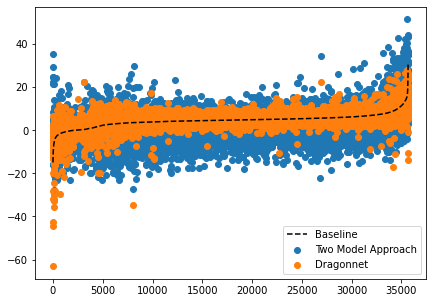

In [1794]:
### Comparison plot of 2 model and Dragonnet
from matplotlib import pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(np.arange(0,TE_test.size,1), z['treatment_effect'], color='black', ls='--', label='Baseline')
plt.scatter(np.arange(0,TE_test.size,1), z['CATE_TwoModel_Fashion'], label="Two Model Approach")
plt.scatter(np.arange(0,TE_test.size,1), z['CATE_Dragon_Fashion'], label="Dragonnet")
plt.legend()

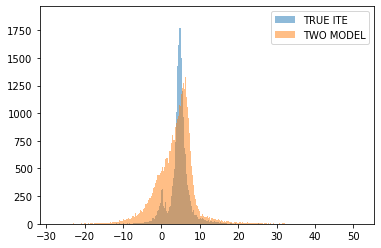

In [1805]:
from matplotlib import pyplot
pyplot.hist(TE_test, 300, alpha=0.5, label='TRUE ITE')
pyplot.hist(CATE_TwoModel_Fashion, 300, alpha=.5, label='TWO MODEL')
pyplot.legend(loc='upper right')
pyplot.show()

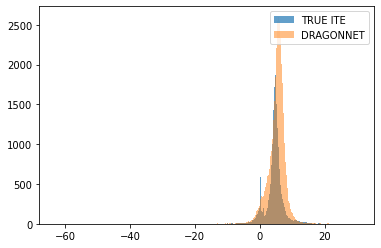

In [1806]:
from matplotlib import pyplot
pyplot.hist(TE_test, 300, alpha=0.7, label='TRUE ITE')
pyplot.hist(CATE_Dragon_Fashion, 300, alpha=.5, label='DRAGONNET')
pyplot.legend(loc='upper right')
pyplot.show()

In [823]:
p = {'neurons_per_layer':[225,250,275],
          'targeted_reg':[False],
          'rtio':[1.],
          'val_split':[0.25,],
          'batch_size':[16,32,64],
          'epochs':[80,90,100],
          'learning_rate':[0.0005,0.0001,0.00005],
          'reg_l2':[0.5,0.01,0.05],
          'loss_func':[dragonnet_loss_binarycross]}

In [824]:
setseed()

In [1874]:
scan_object = talos.Scan(x=X_train_,
                         y=Y_train_,
                         params=p,
                         x_val = X_val,
                         y_val = Y_val,
                         model=make_dragonnet,
                         experiment_name = 'dragonnet',
                         random_method='quantum')

  0%|                                                                          | 0/243 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [41]:
scan_object.best_model(metric='binary_classification_loss', asc=True)

In [42]:
scan_object.data.to_excel("outputfashion.xlsx")

# 7. Bibliography

1.	Sören R. Künzel, Jasjeet S. Sekhon, Peter J. Bickel, and Bin Yu “Metalearners for estimating heterogeneous treatment effects using machine learning”. In:  PNAS March 5, 2019. 
2.	Claudia Shi, David M. Blei and Victor Veitch. “Adapting Neural Networks for the Estimation of Treatment Effects”. In: arXiv:1906.02120v2 [stat.ML] 17 Oct 2019. 
3.	“Causal Inference and Uplift Modeling A review of the literature”. JMLR: Workshop and Conference Proceedings 67:1–13, 2016. 
4.	V. Chernozhukov, D. Chetverikov, M. Demirer, E. Duflo, C. Hansen, and W.Newey. “Double/debiased/neyman machine learning of treatment effects”. In: American Economic Review5 (2017). 
5.	M. van der Laan and S. Rose. “Targeted Learning: Causal Inference for Observational and Experimental Data”.  2011. 
6.	Uri Shalit, Fredrik D. Johansson and David Sontag. “Estimating individual treatment effect: generalization bounds and algorithms”. arXiv:1606.03976v5 [stat.ML] 16 May 2017. 
7.	ROSENBAUM,P.,ANDD. B. RUBIN(1983): “The Central Role of the Propensity Score in Observational Studies for Causal Effects,”Biometrika, 70 (1), 41–55.[781,783,784,786]. 